In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
from matplotlib.lines import Line2D
#check version pandas

# Seaborn is a cool library to use whenever starting data exploration


import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=23)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

import warnings
warnings.filterwarnings("ignore")

In this notebook we are going to look at a particular form of machine learning called unsupervised learning. It is a form that you are probably familiar with through algorithms like PCA or t-SNE. Here you are not really looking at having a predictive model for some variables but rather find a structure for those variables:
![sup_unsup](../images/sup_unsup.png)

# Data exploration
## Table Of Content:
* [**Data prepartion for ML**](#first-bullet)
    * [First look at the data](#FL-bullet)
    * [Value transformation and variance stabilization](#TR-bullet)
    * [Missing Values](#MV-bullet)
    * [Checking Types](#TY-bullet)
    * [OneHot Encoding](#OH-bullet)


* [**Dimensionality reduction/Embedding**](#fourth-bullet)
    * [Principal component analysis](#PCA-bullet)
    * [PCA for immunogenicity dataset](#PCAi-bullet)
    * [Independant component analysis](#ICA-bullet)
    * [t-SNE](#tsne-bullet)
     

* [**Clustering methods**](#fifth-bullet)
    * [K-means](#Kmeans-bullet)
    * [Hierarchichal clustering](#HC-bullet)
    * [DBSCAN](#DBSCAN-bullet)
    
    
* [**Appendix**](#appendix-bullet)
    * [Whitening](#whiten-bullet)
    * [UMAP](#umap-bullet)
    * [Gaussian mixtures](#gm-bullet)


* [**Exo**](#exo-bullet)

# Data prepartion for ML <a class="anchor" id="first-bullet"></a>

### First look at the data <a class="anchor" id="FL-bullet"></a>

In this intoduction we are using a yeast Phospho proteomics dataset [Plank et al. MCP, 2020](https://doi.org/10.1074/mcp.RA120.001955). The study performed a LC-MS/MS experiment and label-free quantitation to study the effect of AGC-kinase (Sch9, Pka1, Ypk1) inhibition on the phosphoproteome. 5 yeast strains were used: WT, and Sch9, Pka1, Sch9&Pka1, Ypk1 mutant strains. Sch9, Pka1, Ypk1 were mutated in order to allow the 1NMPP1 molecule to bind to the mutant and inhibit its active site. DMSO was used as a control. All measurements were performed in 3 technical replicates.

In [2]:
df_ph = pd.read_excel('../data/Phospho_TOR_inhib.xls', sheet_name='Phospho_TOR_inhib',header=0)
df_ph.head()

Peptide sequence Phosphosites Standard name       WT_DMSO  \
0        ADDEEDLS(Phospho)DENIQPELR         S720          ABF1  1.291531e+08   
1       NVVDENLINDMDS(Phospho)EDAHK         S618          ABF1  0.000000e+00   
2                 SNS(Phospho)IDYAK         S467          ABF1  9.528159e+06   
3                  AST(Phospho)PPVK         T157          ABP1  0.000000e+00   
4  KEPVKT(Phospho)PS(Phospho)PAPAAK    T181 S183          ABP1  1.794915e+07   

      WT_DMSO.1     WT_DMSO.2     WT_1NMPP1   WT_1NMPP1.1   WT_1NMPP1.2  \
0  1.378099e+08  1.264078e+08  1.093194e+08  1.207158e+08  1.143397e+08   
1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2  9.008914e+06  8.909709e+06  9.653322e+06  8.720282e+06  9.312677e+06   
3  0.000000e+00  0.000000e+00  6.426355e+05  5.563823e+05  7.040516e+05   
4  1.813076e+07  1.651690e+07  1.630399e+07  1.657684e+07  1.456594e+06   

      Sch9_DMSO  ...  Sch9_Pka1_DMSO.2  Sch9_Pka1_1NMPP1  Sch9_Pka1_1NMPP1.1  \
0  1.178994e+08  ...      1.292352e+08      1.150856e+08        1.289056e+08   
1  0.000000e+00  ...      0.000000e+00      0.000000e+00        8.857596e+06   
2  1.167629e+07  ...      8.144665e+06      1.424212e+07        1.518253e+07   
3  0.000000e+00  ...      0.000000e+00      0.000000e+00        0.000000e+00   
4  0.000000e+00  ...      0.000000e+00      1.015874e+08        8.166463e+07   

   Sch9_Pka1_1NMPP1.2     Ypk1_DMSO   Ypk1_DMSO.1   Ypk1_DMSO.2   Ypk1_1NMPP1  \
0        1.246350e+08  1.027790e+08  9.492511e+07  9.892962e+07  9.760830e+07   
1        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2        1.120638e+07  4.292957e+06  4.453389e+06  5.198223e+06  4.205676e+06   
3        0.000000e+00  0.000000e+00  0.000000e+00  5.659378e+05  1.221233e+06   
4        8.378514e+07  0.000000e+00  0.000000e+00  4.784055e+07  5.243548e+07   

   Ypk1_1NMPP1.1  Ypk1_1NMPP1.2  
0   1.005682e+08   1.023071e+08  
1   0.000000e+00   0.000000e+00  
2   4.287624e+06   6.059179e+06  
3   0.000000e+00   0.000000e+00  
4   5.166661e+07   6.010725e+07  

[5 rows x 33 columns]

We can look at the reproducibility of the resplicates using seaborn `pairplot`.

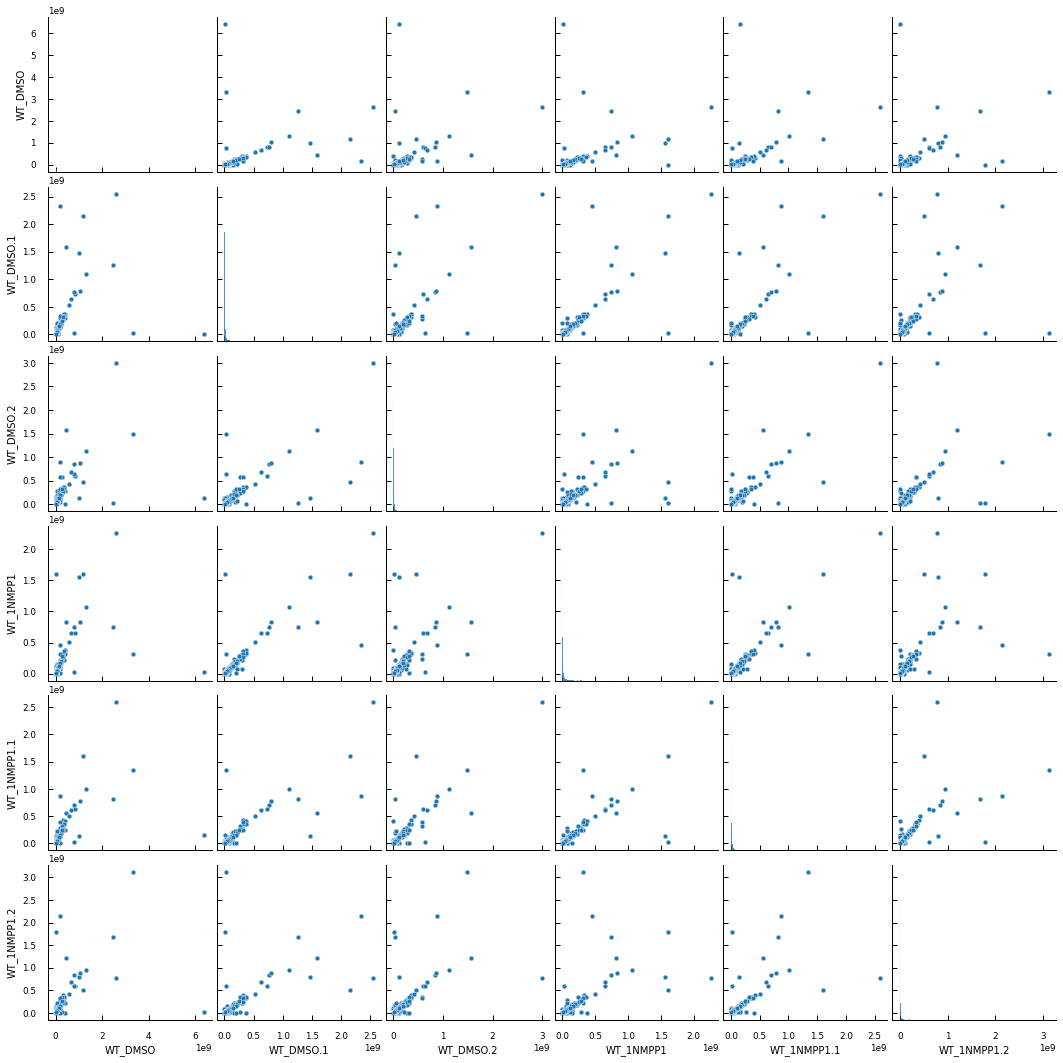

In [3]:
X_ph = df_ph.iloc[:,3:]
sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(X_ph.iloc[:,0:6])

This plot shows an important characteristics of the data: The scatter of the points increases with increasing MS1 intensity values, which is a common feature in quantitative proteomics (and other omics) data. 

We can address this by log-transforming the intensity values, which stabilizes the variance i.e. the scatter or variance will be constant or depend less on the values. This is a desirable feature which makes subsequent data analysis (e.g. t-tests) easier.

### Value transformation and variance stabilization <a class="anchor" id="TR-bullet"></a>

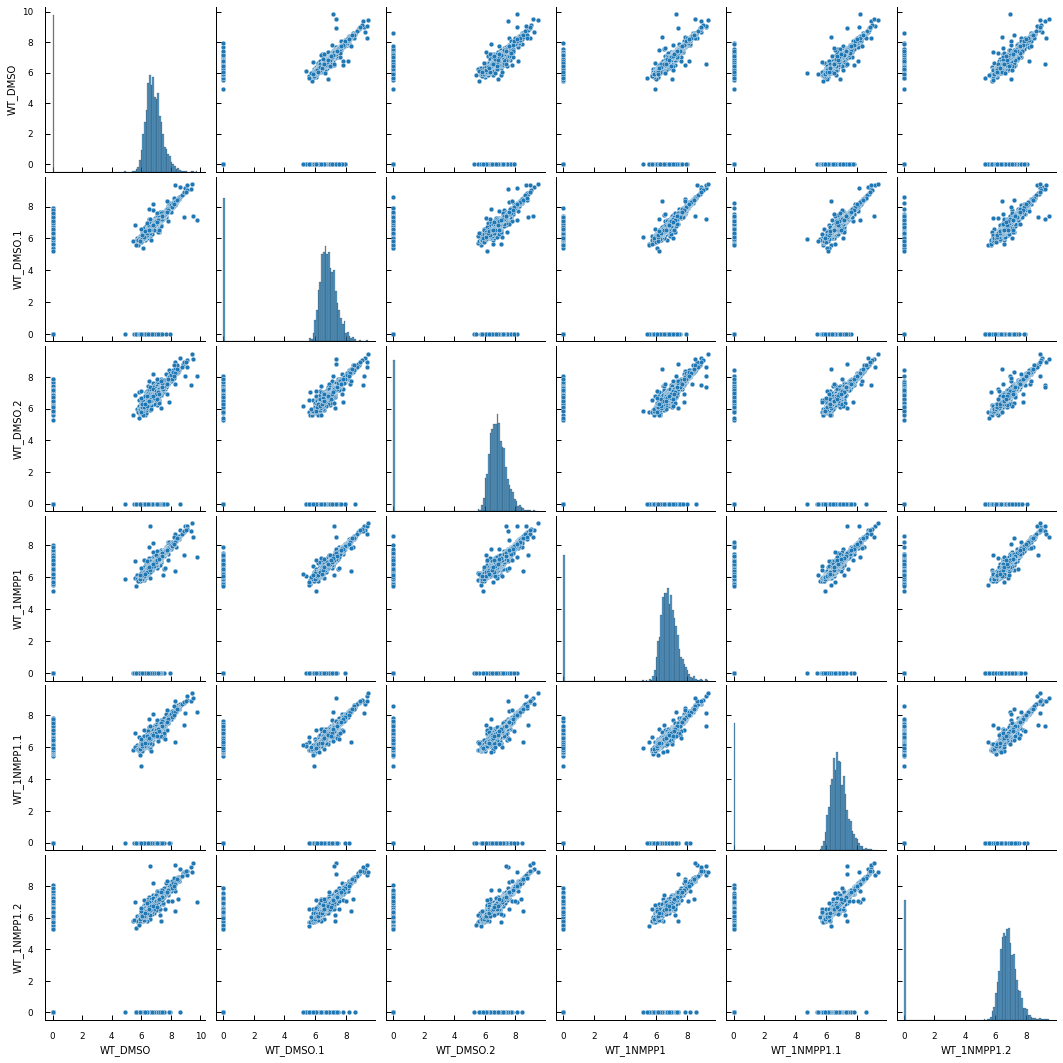

In [4]:
X_ph = X_ph.transform(lambda x: np.log10(x + 1))
sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(X_ph.iloc[:,0:6])

### Missing Values <a class="anchor" id="MV-bullet"></a>

The scatter of the points does not seem to depend anymore on the log-intensity value. The log-intensities are more evenly distributed compared to the raw intensities. The missing or zero values are clearly separated from the positive values. Missing values are common in proteomics data. They are caused by the limited sensitivity of the mass spectrometers or inaccuracies in the computational data processing.

In order to get a better look at the entire dataset, we plot the data as a heatmap:

In [5]:
df_ph.shape

(2959, 33)

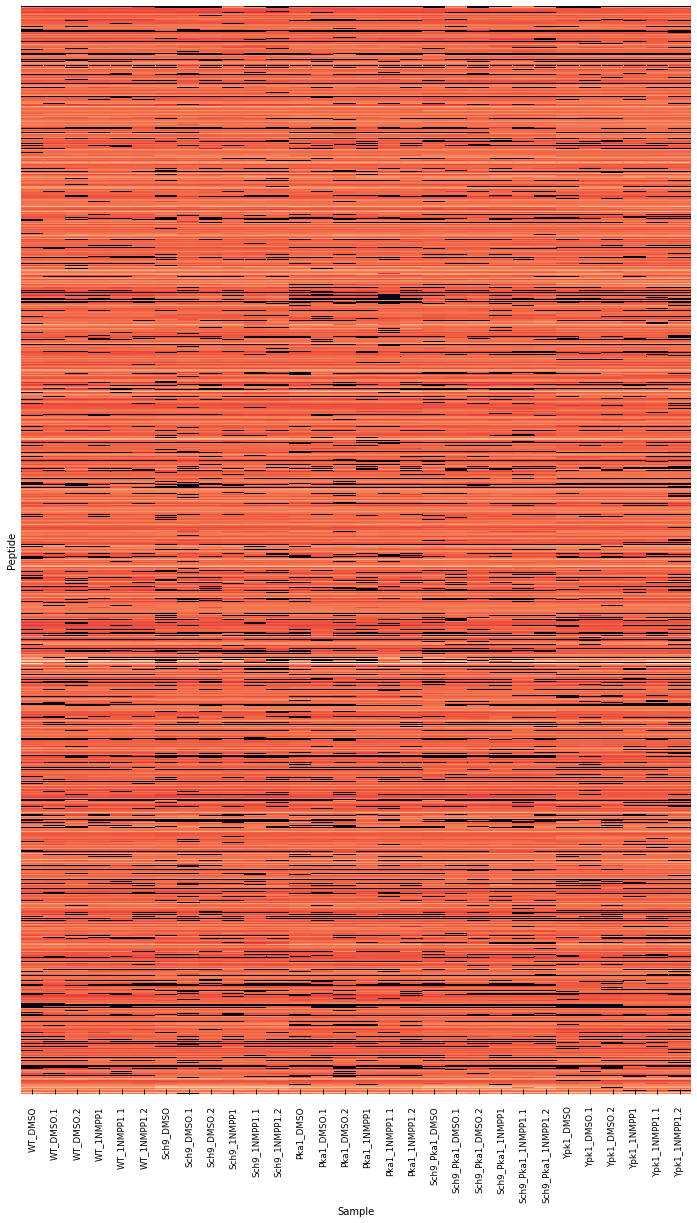

In [6]:
plt.figure(figsize=(12,20))
X_ph.set_index(df_ph['Peptide sequence'], inplace=True)
ax = sns.heatmap(X_ph, cbar=False,yticklabels=False)
plt.xlabel("Sample")
plt.ylabel("Peptide")
plt.show()

This shows that the missing or zero values (dark lines) are ubiquiteous. 

The missing values are not randomly distributed but more likely for low intensity peptides: the average peptide intensity decreases with increasing number of missing values per peptide. 

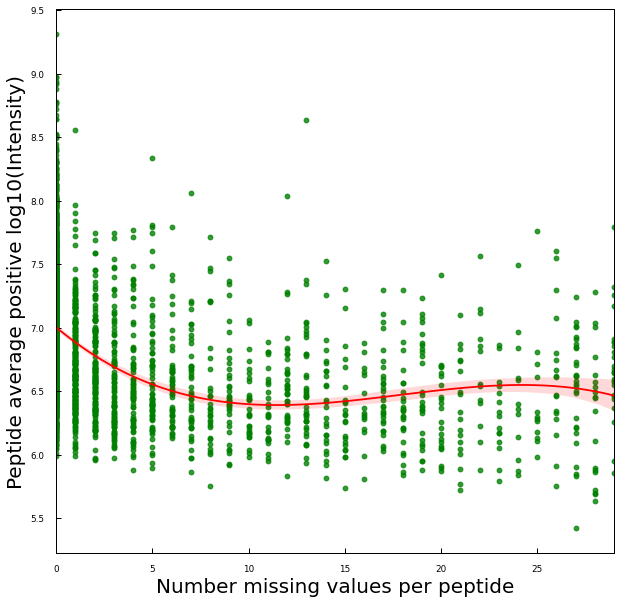

In [7]:
sns.set_context("paper", rc={"axes.labelsize":20})
avg = X_ph[X_ph>0].mean(axis=1)
nr_missing = (X_ph==0).sum(axis=1)

plt.figure(figsize=(10,10))
sns.regplot(x=nr_missing, y=avg, order=3, color="g",line_kws={'color':"red"})
plt.ylabel('Peptide average positive log10(Intensity)')
plt.xlabel('Number missing values per peptide')
plt.show(block=False)

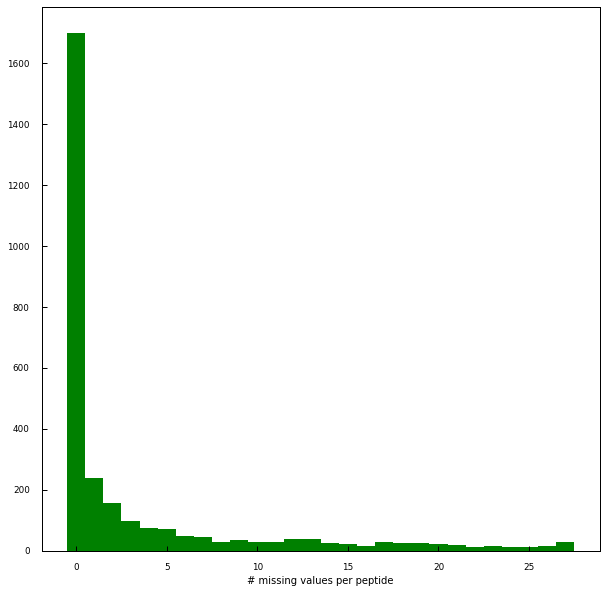

In [8]:
sns.set_context("paper", rc={"axes.labelsize":10})
nr_missing = (X_ph==0).sum(axis=1)
plt.figure(figsize=(10,10))
plt.hist(nr_missing, color="g",bins=np.arange(0,29)-0.5)
plt.xlabel("# missing values per peptide")
plt.show()

They are many ways to deal with missing values. The simplest strategies are just to remove all peptides that contain a missing value or to impute a mean positive value for all zero values.

Most of the peptides have zero missing values and discarding all peptides with missing values is not an optimal, but feasible strategy for these data. 

In [9]:
X_ph_positive = X_ph[(X_ph>0).all(axis=1)]
X_ph_positive.head()

WT_DMSO  WT_DMSO.1  WT_DMSO.2  \
Peptide sequence                                                            
ADDEEDLS(Phospho)DENIQPELR                 8.111105   8.139281   8.101774   
SNS(Phospho)IDYAK                          6.979009   6.954673   6.949864   
KEPVKTPS(Phospho)PAPAAK                    7.376958   7.277585   7.236313   
NEKS(Phospho)PAQLWAER                      6.157649   6.020137   6.151031   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK  7.088574   7.040337   7.016449   

                                           WT_1NMPP1  WT_1NMPP1.1  \
Peptide sequence                                                    
ADDEEDLS(Phospho)DENIQPELR                  8.038697     8.081764   
SNS(Phospho)IDYAK                           6.984677     6.940531   
KEPVKTPS(Phospho)PAPAAK                     7.379282     7.286498   
NEKS(Phospho)PAQLWAER                       6.146390     6.070549   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK   7.006731     6.976935   

                                           WT_1NMPP1.2  Sch9_DMSO  \
Peptide sequence                                                    
ADDEEDLS(Phospho)DENIQPELR                    8.058197   8.071512   
SNS(Phospho)IDYAK                             6.969075   7.067305   
KEPVKTPS(Phospho)PAPAAK                       7.263972   7.633745   
NEKS(Phospho)PAQLWAER                         6.110564   6.381188   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     6.977722   7.017229   

                                           Sch9_DMSO.1  Sch9_DMSO.2  \
Peptide sequence                                                      
ADDEEDLS(Phospho)DENIQPELR                    8.165305     8.080783   
SNS(Phospho)IDYAK                             7.071589     6.999701   
KEPVKTPS(Phospho)PAPAAK                       7.687869     7.546505   
NEKS(Phospho)PAQLWAER                         6.332733     6.460504   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     7.010478     6.982010   

                                           Sch9_1NMPP1  ...  Sch9_Pka1_DMSO.2  \
Peptide sequence                                        ...                     
ADDEEDLS(Phospho)DENIQPELR                    8.132232  ...          8.111381   
SNS(Phospho)IDYAK                             7.135595  ...          6.910873   
KEPVKTPS(Phospho)PAPAAK                       7.629455  ...          7.593738   
NEKS(Phospho)PAQLWAER                         6.445138  ...          6.588172   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     6.957545  ...          6.973805   

                                           Sch9_Pka1_1NMPP1  \
Peptide sequence                                              
ADDEEDLS(Phospho)DENIQPELR                         8.061021   
SNS(Phospho)IDYAK                                  7.153575   
KEPVKTPS(Phospho)PAPAAK                            7.760404   
NEKS(Phospho)PAQLWAER                              6.748983   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK          6.966654   

                                           Sch9_Pka1_1NMPP1.1  \
Peptide sequence                                                
ADDEEDLS(Phospho)DENIQPELR                           8.110272   
SNS(Phospho)IDYAK                                    7.181344   
KEPVKTPS(Phospho)PAPAAK                              7.759729   
NEKS(Phospho)PAQLWAER                                6.737448   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK            6.968440   

                                           Sch9_Pka1_1NMPP1.2  Ypk1_DMSO  \
Peptide sequence                                                           
ADDEEDLS(Phospho)DENIQPELR                           8.095640   8.011904   
SNS(Phospho)IDYAK                                    7.049465   6.632757   
KEPVKTPS(Phospho)PAPAAK                              7.696079   7.463205   
NEKS(Phospho)PAQLWAER                                6.666609   6.304341   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK            6.959224   7.071196   

                                       

In [10]:
X_ph_positive.shape

(1699, 30)

Another missing value strategy would be to impute all zero values with the half min of all positive values for each peptide (row). 

In [11]:
min_col=np.min(X_ph_positive,axis=1)
X_ph_imputed=np.copy(X_ph)
for i in range(X_ph_imputed.shape[1]):
    for j in range(X_ph_imputed.shape[0]):
        if X_ph_imputed[j][i]==0:
            X_ph_imputed[j][i]=min_col[i]/2
X_ph_imputed = pd.DataFrame(X_ph_imputed, columns=X_ph.columns, index=X_ph.index)
X_ph_imputed.head()

WT_DMSO  WT_DMSO.1  WT_DMSO.2  WT_1NMPP1  \
Peptide sequence                                                              
ADDEEDLS(Phospho)DENIQPELR        8.111105   8.139281   8.101774   8.038697   
NVVDENLINDMDS(Phospho)EDAHK       3.988691   3.297792   3.611155   3.010069   
SNS(Phospho)IDYAK                 6.979009   6.954673   6.949864   6.984677   
AST(Phospho)PPVK                  3.988691   3.297792   3.611155   5.807965   
KEPVKT(Phospho)PS(Phospho)PAPAAK  7.254044   7.258416   7.217928   7.212294   

                                  WT_1NMPP1.1  WT_1NMPP1.2  Sch9_DMSO  \
Peptide sequence                                                        
ADDEEDLS(Phospho)DENIQPELR           8.081764     8.058197   8.071512   
NVVDENLINDMDS(Phospho)EDAHK          3.466283     3.127760   2.991254   
SNS(Phospho)IDYAK                    6.940531     6.969075   7.067305   
AST(Phospho)PPVK                     5.745374     5.847605   2.991254   
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.219502     6.163339   2.991254   

                                  Sch9_DMSO.1  Sch9_DMSO.2  Sch9_1NMPP1  ...  \
Peptide sequence                                                         ...   
ADDEEDLS(Phospho)DENIQPELR           8.165305     8.080783     8.132232  ...   
NVVDENLINDMDS(Phospho)EDAHK          3.261250     3.128138     6.888168  ...   
SNS(Phospho)IDYAK                    7.071589     6.999701     7.135595  ...   
AST(Phospho)PPVK                     6.212480     6.184184     6.172707  ...   
KEPVKT(Phospho)PS(Phospho)PAPAAK     3.261250     3.128138     7.902286  ...   

                                  Sch9_Pka1_DMSO.2  Sch9_Pka1_1NMPP1  \
Peptide sequence                                                       
ADDEEDLS(Phospho)DENIQPELR                8.111381          8.061021   
NVVDENLINDMDS(Phospho)EDAHK               3.329194          3.918509   
SNS(Phospho)IDYAK                         6.910873          7.153575   
AST(Phospho)PPVK                          3.329194          3.918509   
KEPVKT(Phospho)PS(Phospho)PAPAAK          3.329194          8.006840   

                                  Sch9_Pka1_1NMPP1.1  Sch9_Pka1_1NMPP1.2  \
Peptide sequence                                                           
ADDEEDLS(Phospho)DENIQPELR                  8.110272            8.095640   
NVVDENLINDMDS(Phospho)EDAHK                 6.947316            3.088472   
SNS(Phospho)IDYAK                           7.181344            7.049465   
AST(Phospho)PPVK                            3.233033            3.088472   
KEPVKT(Phospho)PS(Phospho)PAPAAK            7.912034            7.923167   

                                  Ypk1_DMSO  Ypk1_DMSO.1  Ypk1_DMSO.2  \
Peptide sequence                                                        
ADDEEDLS(Phospho)DENIQPELR         8.011904     7.977381     7.995326   
NVVDENLINDMDS(Phospho)EDAHK        3.143656     2.994178     3.401736   
SNS(Phospho)IDYAK                  6.632757     6.648691     6.715855   
AST(Phospho)PPVK                   3.143656     2.994178     5.752769   
KEPVKT(Phospho)PS(Phospho)PAPAAK   3.143656     2.994178     7.679796   

                                  Ypk1_1NMPP1  Ypk1_1NMPP1.1  Ypk1_1NMPP1.2  
Peptide sequence                                                             
ADDEEDLS(Phospho)DENIQPELR           7.989487       8.002461       8.009906  
NVVDENLINDMDS(Phospho)EDAHK          3.428491       3.517986       3.584932  
SNS(Phospho)IDYAK                    6.623836       6.632217       6.782414  
AST(Phospho)PPVK                     6.086799       3.517986       3.584932  
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.719625       7.713210       7.778927  

[5 rows x 30 columns]

Next we would like to have a look at the correlation between treatments:

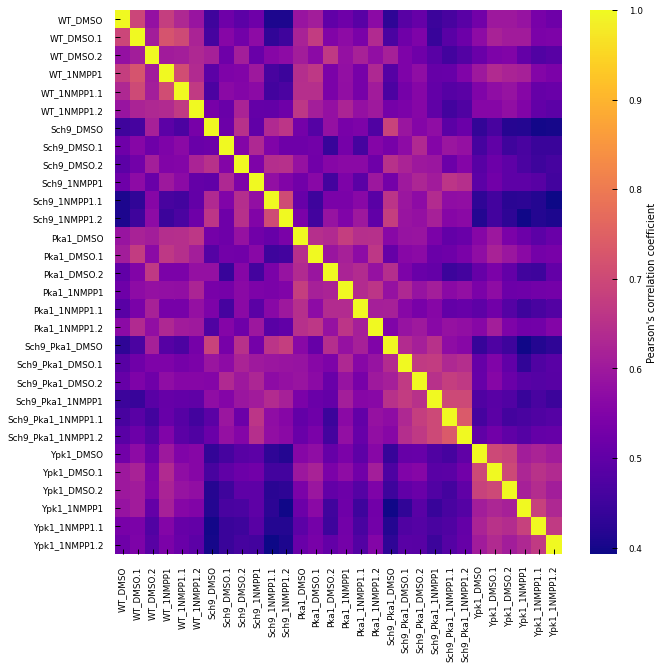

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(X_ph.corr(),cmap='plasma',cbar_kws={'label': "Pearson's correlation coefficient"})
plt.show()

We see that the replicates of the same mutant strain correlate and the mutant strain has a stronger effect than the treatment (1NMPP1 or DMSO).

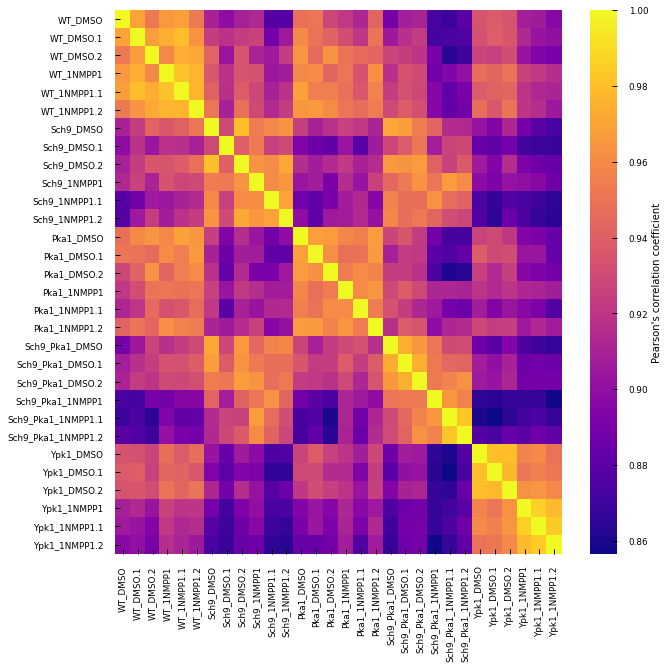

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(X_ph_positive.corr(),cmap='plasma',cbar_kws={'label': "Pearson's correlation coefficient"})
plt.show()

Removing missing values in this case clearly improves the correlation between treatments! For more imputation techniques check : [Scikit-learn imputation](https://scikit-learn.org/stable/modules/impute.html). There is abundant literature and sofisticated methods on missing value imputation. Unfortunately we cannot cover this important subject in this course.

### Making sure columns are the right type <a class="anchor" id="TY-bullet"></a>

In [14]:
df_ph.dtypes

Peptide sequence       object
Phosphosites           object
Standard name          object
WT_DMSO               float64
WT_DMSO.1             float64
WT_DMSO.2             float64
WT_1NMPP1             float64
WT_1NMPP1.1           float64
WT_1NMPP1.2           float64
Sch9_DMSO             float64
Sch9_DMSO.1           float64
Sch9_DMSO.2           float64
Sch9_1NMPP1           float64
Sch9_1NMPP1.1         float64
Sch9_1NMPP1.2         float64
Pka1_DMSO             float64
Pka1_DMSO.1           float64
Pka1_DMSO.2           float64
Pka1_1NMPP1           float64
Pka1_1NMPP1.1         float64
Pka1_1NMPP1.2         float64
Sch9_Pka1_DMSO        float64
Sch9_Pka1_DMSO.1      float64
Sch9_Pka1_DMSO.2      float64
Sch9_Pka1_1NMPP1      float64
Sch9_Pka1_1NMPP1.1    float64
Sch9_Pka1_1NMPP1.2    float64
Ypk1_DMSO             float64
Ypk1_DMSO.1           float64
Ypk1_DMSO.2           float64
Ypk1_1NMPP1           float64
Ypk1_1NMPP1.1         float64
Ypk1_1NMPP1.2         float64
dtype: obj

It is a good idea to check the dtype of you dataframe values and check whether they have the correct type. Here the types are correct, but if you wanted to change them you could use the following syntax:

In [15]:
df_ph["WT_DMSO"] = df_ph["WT_DMSO"].astype('float64')

### One hot encoding of categorical data <a class="anchor" id="OH-bullet"></a>

Certain ML algorithms (linear models, SVMs, NNs) require numerical values. Ordered categorical features (e.g. size = small, medium, large) or features with just two values can just be enumerated (e.g. size = 1,2,3). However, unordered categorical features or factors (e.g. color = blue, gray, pink) need to be turned into orthogonal vectors of 0 and 1, where each index in the vector corresponds to a level of the factor (e.g. blue = (1,0,0), gray = (0,1,0) and pink = (0,0,1). This is the so-called OneHot encoding of categorical features.

Lets assume we would like to include the gene name (Standard Name) in a SVM classification and we perform OneHot encoding:

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat = df_ph[['Standard name']]
ohe = pd.DataFrame(enc.fit_transform(cat).toarray())

ohe.head()

0     1     2     3     4     5     6     7     8     9     ...  1138  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1139  1140  1141  1142  1143  1144  1145  1146  1147  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1148 columns]

# Enough with data processing let's start some real science

## Dimensionality reduction <a class="anchor" id="fourth-bullet"></a>

Dimensionality reduction serves two puposes
<ol>
<li><b>Visualization</b>: reducing the number of dimensions to 2 or 3 allows displaying the whole dataset for visual inspection</li>
<li><b>Data compression</b>: some features may be little informative and projecting feature vectors to the principal data manifold allows discarding the uninformative part of the feature space</li>
</ol> 

### Principal Component Analysis (PCA) <a class="anchor" id="PCA-bullet"></a>

As described in the lecture notes, PCA finds the direction in feature space with the largest variance (first principal component), meaning the direction where the data points are most spread out. Then it repeats the same algorithm to find the direction orthogonal to the first principal component (second principal component) with the largest (remaining) variance. The second principal component can only give information about the variance not explained by the first component. Mathematically this boils down to the eigenvalue decomposition or diagonalization of the covariance matrix, where the eigenvalue is the variance of the data along its eigenvector (principal component).

In PCA are looking for the matrix of eigenvalues $\pmb{D}$ and orthogonal basis vectors (eigenvectors) $\pmb{W}$, that satisfies the following relation:

$\pmb{X}^T\pmb{X}=\pmb{W}\pmb{D}\pmb{W}^T$

$\pmb{X}$ must be centered around the mean value of each feature vector (each column in the dataframe has zero empirical mean), so that $\pmb{Q}=\pmb{X}^T\pmb{X}$ is the covariance matrix of your multidimensional data (zero centering is done by the PCA algorithm, so no need to do it yourself).

Note: algorithms that perfom PCA generally use Singular Value Decomposition (SVD). 

The output of such a process is a set of eigenvectors or PCs (which are a linear combination of your former features) and the variance corresponding to each eigenvector (eigenvalues).

![Pca](../images/PCA.png)

The eigenvalues are in decreasing order to give us their decreasing signficance to explain the overall variance. The Scikit-learn [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) has, as other scikit classes, two main methods: fit() and transform(). For a data matrix $\pmb{X}$ of size NxM (N data rows, M feature colums) the fit($\pmb{X}$) calculates $\pmb{W}$ (with the M PCs as columns) of $\pmb{X}$ and the transform($\pmb{X}$) method provides the coordinates of the N data vectors in the eigenvector or principal component space by calculating $\pmb{X'}=\pmb{X}\pmb{W}$ (in case of 'whiten'=False).

PCA analysis has a clear mathematical framework and is fast to calculate (compared to t-SNE, for example). It can be easily applied to distributed data and is therefore also attractive for very large datasets. It also serves as a preprocessing step to de-correlate or 'whiten' a data matrix (see Appendix).

If you would like to know what the function PCA.transform(), PCA.fit() or any other python function are doing exactly, it is a good idea to inspect the source code of these functions:

In [17]:
from sklearn.decomposition import PCA
import inspect

print(inspect.getsource(PCA.transform))

    def transform(self, X):
        """Apply dimensionality reduction to X.

        X is projected on the first principal components previously extracted
        from a training set.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples is the number of samples
            and n_features is the number of features.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)
        """
        check_is_fitted(self)

        X = self._validate_data(X, dtype=[np.float64, np.float32], reset=False)
        if self.mean_ is not None:
            X = X - self.mean_
        X_transformed = np.dot(X, self.components_.T)
        if self.whiten:
            X_transformed /= np.sqrt(self.explained_variance_)
        return X_transformed



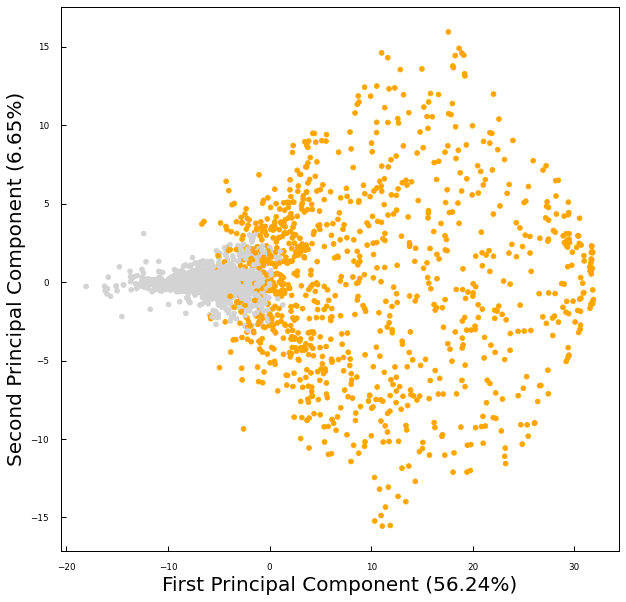

In [18]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA() #create an empty PCA object

pca.fit(X_ph) # calcultes variances (eigenvalues)) and principal components (eigenvectors)

x_pca = pca.transform(X_ph) # calculates coordinates of row vectors in X in PC space

mv_color=["lightgray" if mv_cnt<2 else "orange" for mv_cnt in nr_missing]

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=mv_color)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

We see that the first two principal components explain more than 60% of the total variance. There is a large scatter in the points to the right in the plot. This is due to the missing values (orange points). Discarding of the peptides with missing values removes this variance.

### PCA on the phospho peptide dataset

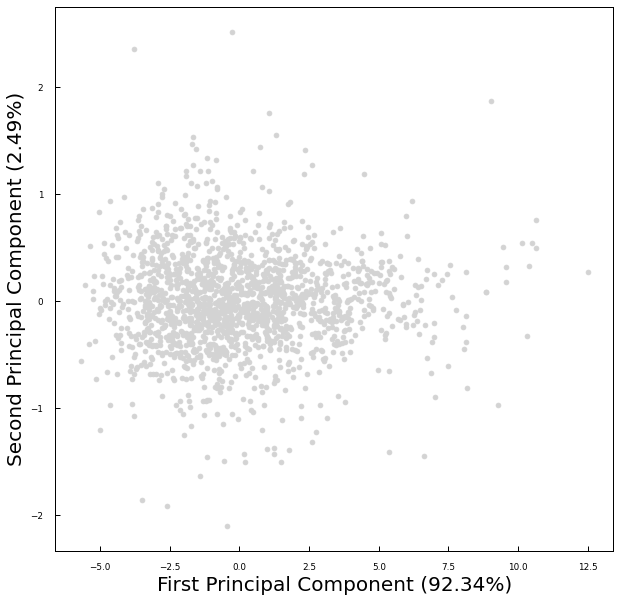

In [19]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA() #create an empty PCA object

pca.fit(X_ph_positive) # calcultes variances (eigenvalues)) and principal components (eigenvectors)

x_pca = pca.transform(X_ph_positive) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

Now the first PC explains 92% of the variance, i.e. the data is almost 1-dimensional! What is going on? Inspection of the data shows that the peptides (rows) have different total intensities and the first PC just reflects this intensity difference.

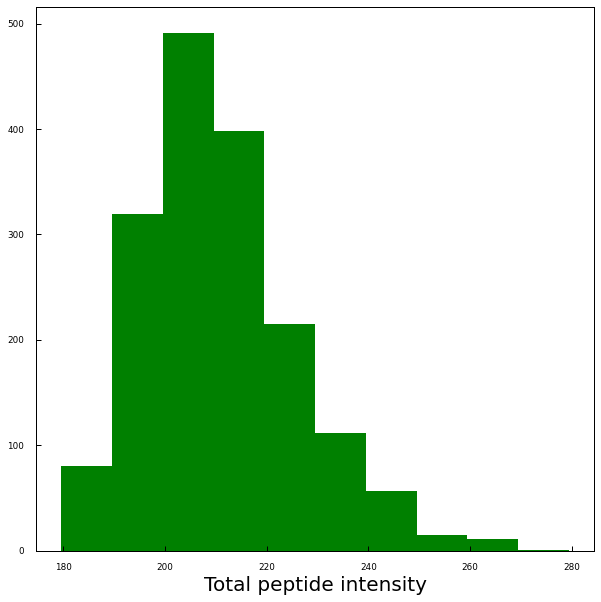

In [20]:
sns.set_context("paper", rc={"axes.labelsize":20})
pept_intens = X_ph_positive.sum(axis=1)
plt.figure(figsize=(10,10))
plt.hist(pept_intens, color="g")
plt.xlabel("Total peptide intensity")
plt.show()

In this study we are not interested in the total peptide intensity, but only in the realtive intensities between treatments (columns). Therefore we can normailze the peptide rows and make sure that each row has a total intensity of 1.

Remark: the PCA class has a 'withen' parameter (see Appendix). However, it does not remove the intensity dependency here and and does not change the plot (try it yourself!).

This is a recurent problem with distance based algorithm like PCA : it will pick difference of scale between the features, eventhough those are not significant for the biology you want to explain or even worse are simple artifact. You knowledge of your data will tell you if you need or not to rescale, if that scale difference is important for you or not. To illustrate this important matter let's look at the following toy dataset.

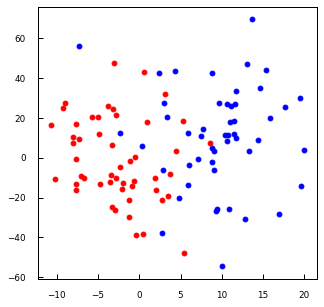

In [21]:
# creating some toy data : just two classes 
# that are explained by different scales along x and y and different means.
# (you don't need two for what I am trying to prove but for consistency I decided to use 2)

X1=np.zeros((50,2),dtype='f')
X2=np.zeros((50,2),dtype='f')
for i in range(50):
    X1[i][0]=np.random.randn()*5+10 #(one axis has a scale of 5)
    X1[i][1]=np.random.randn()*25+10 #(one axis has a scale of 25)
    X2[i][0]=np.random.randn()*5+-2
    X2[i][1]=np.random.randn()*25+2
X=np.vstack(np.array([X1,X2]))
np.shape(X)
fig,ax=plt.subplots(1,1,figsize=(5,5))
plt.plot(X[:50,0],X[:50,1],'bo')
plt.plot(X[50:,0],X[50:,1],'ro')
plt.show()

If you want to separate the red points from the blue points your intuition would tell you to draw a vertical line somewehere around $x=4$. 

Can the PCA help us do better than that? 

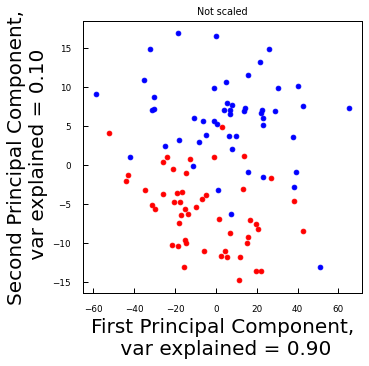

In [22]:
pca = PCA()#create a PCA object

pca.fit(X)#calculate the eigenvalues and eigenvectors according to data

x_pca = pca.transform(X)# Calculate the new points coordinates according to the previously found eigenvectors.
var_explained=pca.explained_variance_ratio_
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:50,0],x_pca[:50,1],color='b')
plt.scatter(x_pca[50:,0],x_pca[50:,1],color='r')
plt.title('Not scaled')
plt.xlabel('First Principal Component,\n var explained = {0:.2f}'.format(var_explained[0]))
plt.ylabel('Second Principal Component,\n var explained = {0:.2f}'.format(var_explained[1]))

plt.show()

If you don't rescale you might have the impression that 91 % (see `First principal component, var explained=0.91`) of your variance comes from the first component and so that your data is almost one dimensional... 
In fact by construction you know that it is not true and the only thing that you are measuring is the difference of scales in the data.

Even worse : you could have an intuition of where to cut to split qualitatively your data but now your PCA is telling that the inner organization of the data doesn't follow your intuition (your intuition tells you to do it along the second axis, but the PCA tells you that's not much of how your data are organized...).

However, when you rescale you realize that the two dimensions are actually equivalent (see below), and your intuitive cuting follows a perfect linear combination of those two equivalent dimensions!

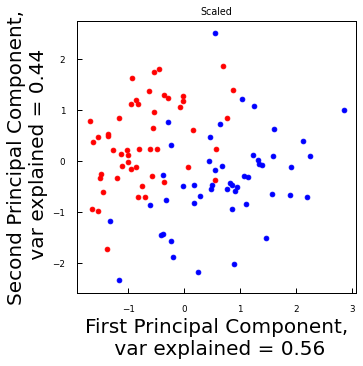

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #define the scaler object
scaler.fit(X) 
scaled_data = scaler.transform(X)
pca = PCA()#create a PCA object

pca.fit(scaled_data)#calculate the eigenvalues and eigenvectors according to rescaled data

x_pca = pca.transform(scaled_data)# Calculate the new points coordinate according to the previously found eigenvectors.
var_explained=pca.explained_variance_ratio_
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:50,0],x_pca[:50,1],color='b')
plt.scatter(x_pca[50:,0],x_pca[50:,1],color='r')
plt.title('Scaled')
plt.xlabel('First Principal Component,\n var explained = {0:.2f}'.format(var_explained[0]))
plt.ylabel('Second Principal Component,\n var explained = {0:.2f}'.format(var_explained[1]))

plt.show()

**Back to real data**

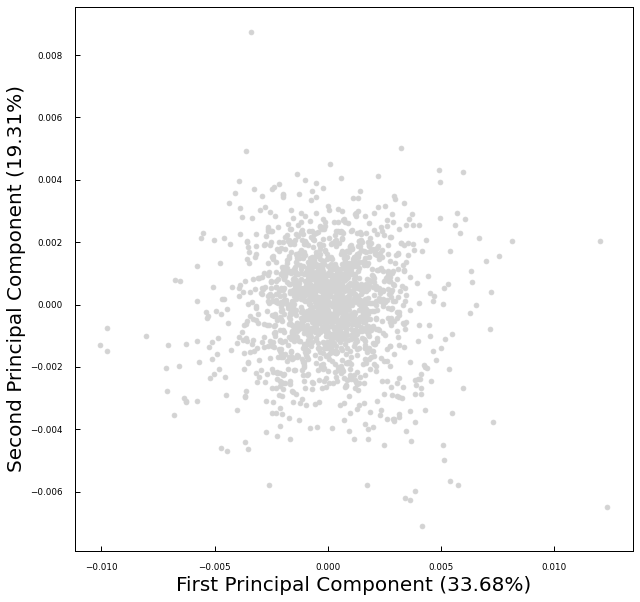

In [24]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA() #create an empty PCA object

X_ph_norm = X_ph_positive.div(pept_intens, axis=0)

pca.fit(X_ph_norm) # calcultes variances (eigenvalues)) and principal components (eigenvectors)
x_pca = pca.transform(X_ph_norm) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

We see that the variance along the first PC is now reduced to 34%. Now the PCA plot does not tell us much about the data. We can get more information by plotting the directions that correspond to the individual treatments. We can get the treatment directions via pca.components_, which is our MxM matrix $\pmb{W}^T$ (M = number of columns, features or treatments) where each row holds the PC coordinates in feature space and each column the treatment coordinates in PC space. The rows of pca.components_ are ordered by decreasing variance. 

The visualization of this matrix also reveals that the componenents of first 5 PC show good aggreement between replicates, and afterwards the PC componenents become noisy.

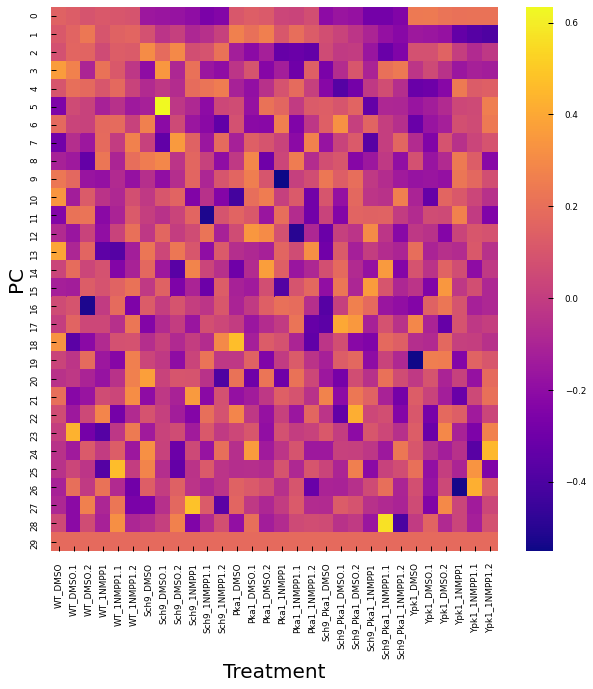

In [25]:
sns.set_context("paper", rc={"axes.labelsize":20})
df_comp = pd.DataFrame(pca.components_,columns=X_ph.columns)
plt.figure(figsize=(10,10))
sns.heatmap(df_comp,cmap='plasma')
plt.xlabel("Treatment")
plt.ylabel("PC")
plt.show()

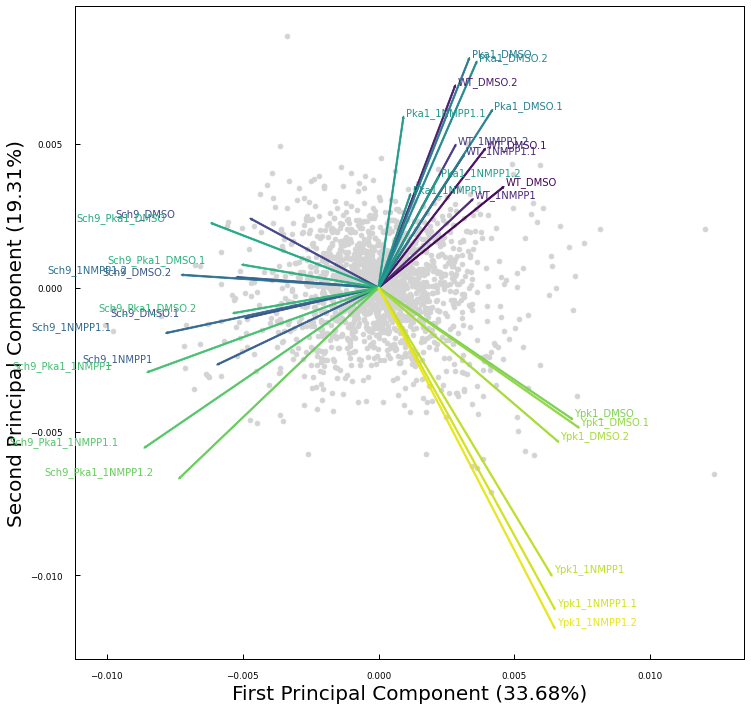

In [26]:
sns.set_context("paper", rc={"axes.labelsize":20})
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

feature_vectors = pca.components_.T
arrow_size = 0.03

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, X_ph.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    

plt.show()


We see now that the Ypk1 mutants cluster together and 1NMPP1 treatments are distinct from DMSO control. Pka1 clusters with the WT strains and there is less difference between treatment and control. Sch9 and Sch9_Pka1 are similar indicating the Sch9 mutant effect is stronger than the Pka1. Overal the mutant effect seems stronger than the treatment effect.

### Gene drug sens

In the following dataset (https://doi.org/10.1038/s41586-018-0623-z) we have the expression level of some genes from some different AML tumors as well as how they respond to treatment (AUC value). Between those different tumors there are probably different mutations occuring in different genes.

In [27]:
df=pd.read_excel('/home/seb/Documents/My_courses/intro-machine-learning-training/data/seb/gene_drug_sens.xlsx')
X_im=df[df.columns[9:]]
X_im['auc']=df.auc
X_im

CD86    FAM49A      ERMN      CHD5  RP11-333E13.2    KLHDC3      HNMT  \
0  -1.120073 -0.148654 -1.579624 -0.756073       0.471452  1.068268 -0.157964   
1   2.498957 -1.015880 -0.859471 -0.555560      -0.142550 -0.161521  2.279642   
2   0.176687 -0.490400 -0.611194 -0.443875       0.876031 -0.147330  0.112438   
3   0.918236  0.377131 -0.410336 -0.033461      -0.014791  1.218267  1.122505   
4  -1.004299 -0.826399  0.995739 -1.426430      -0.053345  0.585897 -0.876732   
..       ...       ...       ...       ...            ...       ...       ...   
85 -1.067348  0.375596  1.771076 -0.399354      -1.044105  0.594522 -0.708772   
86 -1.310561  1.287158 -2.283581 -1.266190       2.592796 -1.093331 -0.833079   
87  1.057348 -0.932812  1.000186  0.225402       1.040826  0.481376  0.031964   
88  0.757028  0.756097  1.588244 -0.275247      -0.561752 -1.247487  1.335650   
89  0.200068 -1.481444 -1.299560 -0.002416      -1.116107  0.250919 -0.302203   

       ADAP2    B3GNT2  RP11-196G18.24      TLR2    MIR223   RAB43P1  \
0  -1.001751  1.556003       -1.608982  0.751515  0.987769  0.232332   
1  -0.933841 -0.189892        0.313041  2.097701 -1.627445 -0.961402   
2  -0.185127  0.235198       -1.389968  0.007096  1.291810 -0.504791   
3  -0.333728  0.038227       -0.187054 -0.376509  0.826023  0.847269   
4   0.564804 -0.835560       -0.566891  0.546441 -0.371254  1.609191   
..       ...       ...             ...       ...       ...       ...   
85  0.535716 -2.357696        0.106024  1.372926 -0.070870 -2.211611   
86 -0.528661 -0.565556        0.718752 -0.505527  0.878993 -1.366680   
87  0.296229  0.676010        1.209167  0.350695 -0.573494 -0.414233   
88  1.327648 -1.900678        0.970238  1.482113 -0.238825  0.133316   
89  0.188313  0.529936        0.827819 -0.666892  1.221258  0.678577   

        GYPC  HSD17B13   HNRNPA1     NAPSB         auc  
0   0.981147 -2.021119 -1.185687 -0.710025  257.569985  
1  -0.523684  0.255906  0.885343  0.900553  168.267467  
2   0.813038 -0.741312 -1.180863 -2.541507  271.034652  
3  -0.466044  0.374157  0.585562 -0.747859  286.109498  
4   0.220240 -2.180800  1.076900  0.411095  261.794860  
..       ...       ...       ...       ...         ...  
85 -1.498569  0.642654  0.692451  0.881090  135.218527  
86  1.671184  0.477008  0.628229 -1.976513  278.970613  
87 -0.383781  1.160892  0.654738  1.413865  124.302935  
88 -0.107214 -0.544004  1.094630  1.431997  174.745142  
89  0.518283  0.111228 -0.562130  0.219717  259.485443  

[90 rows x 18 columns]

**Exo** . Perfom a pca on that dataset. Choose an interesting number of dimension and interpret the plot : what do the first component stands for. Can you say anything about driving genes. Tu pourras mettre ca en correction peut etre...

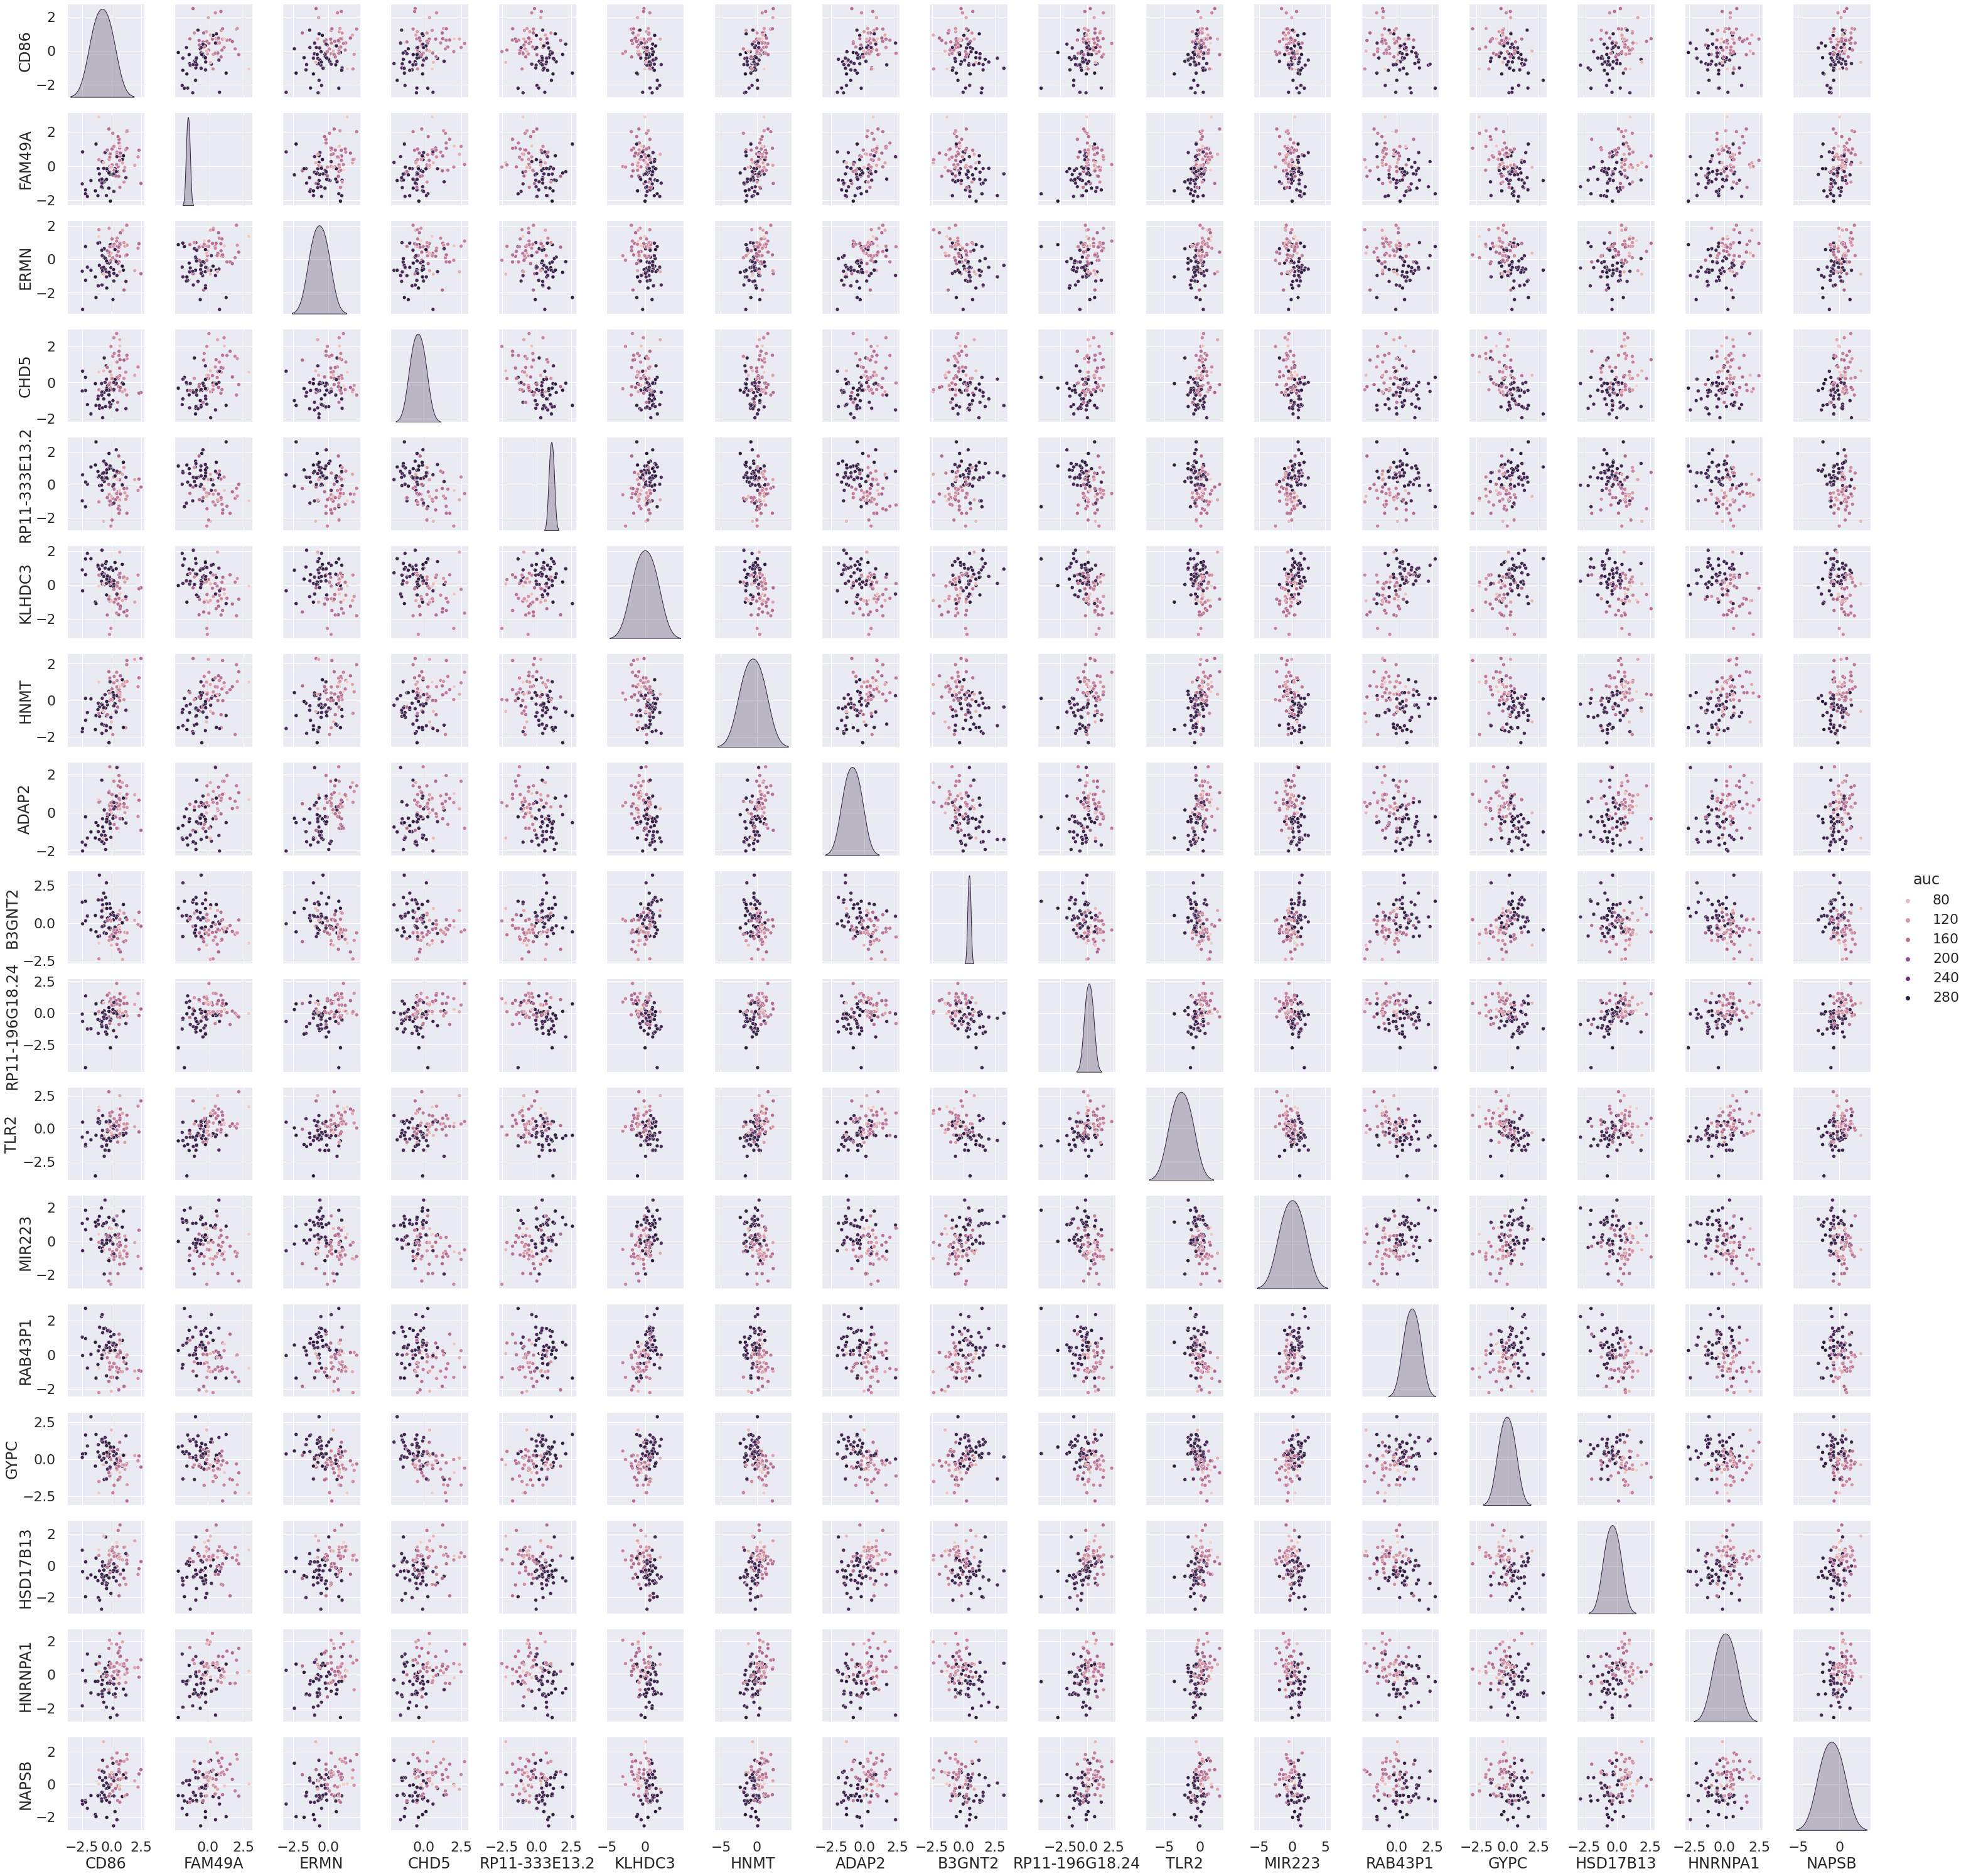

In [28]:
sns.set_context("paper", rc={"axes.labelsize":20})
sns.set(font_scale = 2)
sns.pairplot(df,hue='auc')

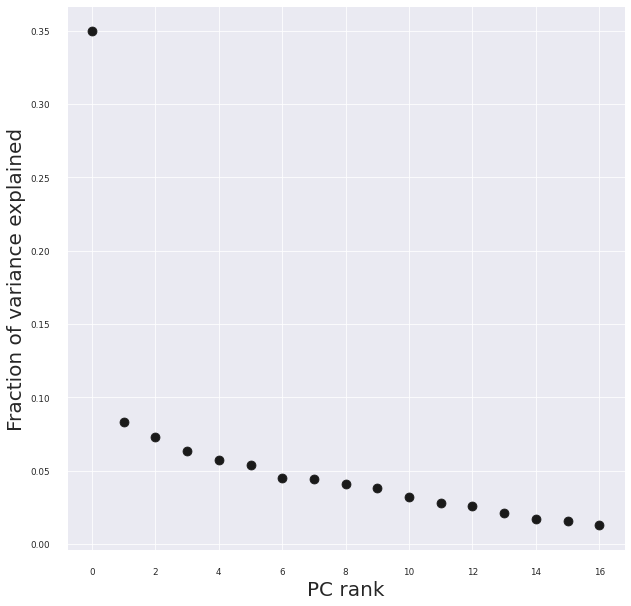

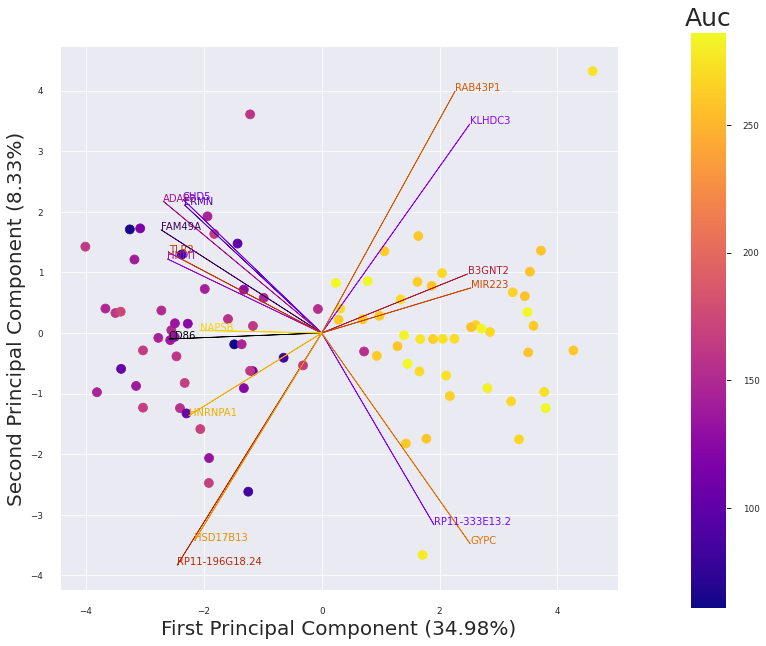

In [29]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA()
x_pca = pca.fit_transform(X_im[X_im.columns[:-1]]) # calculates coordinates of row vectors in X in PC space
feature_vectors = pca.components_.T

arrow_size = 10

plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_,s=80,c='k')
plt.ylabel('Fraction of variance explained')
plt.xlabel('PC rank')
plt.show()

plt.figure(figsize=(10,10))
aa=plt.scatter(x_pca[:,0],x_pca[:,1],c=X_im.auc,s=80,cmap='plasma')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

cmap = cm.get_cmap('gnuplot')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, X_im.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)


axo = plt.axes([1,0.1,0.05,0.8])

plt.title("Auc",fontsize=25)
plt.colorbar(aa, cax=axo, orientation='vertical')


    




plt.show()

### t-SNE <a class="anchor" id="tsne-bullet"></a>

t-SNE (t-distributed Stochstic Neighbourhood Embedding) is a dimensionality reduction algorithm introduced by [Maaten and Hinton, 2008](https://www.jmlr.org/papers/v9/vandermaaten08a.html). Unlike PCA or ICA it is not a linear method. 

#### A little bit of mathematics:

t-SNE assumes that the in the high dimensional data points are normally distributed with variances $\sigma_i^2$. Namely distance between points $\bf{x_i}$ and $\bf{x_j}$ is represented as: 

$p_{i|j}=\frac{exp(-||x_{i}-x_{j}||^2/(2\sigma_i^2))}{\sum_{k\neq_i}exp(-||x_{i}-x_{k}||^2/(2\sigma_i^2))}$

For the representation in the low dimensional space, t-SNE uses a heavy tailed t-distribution, which does not penalize large distances much. This gives us the flexibility needed to stretch the high dimensional data onto a low dimensional space and will allow better visual separability of the clusters. 

$q_{i|j}=\frac{(1+||y_{i}-y_{j}||^2)^{-1}}{\sum_{k\neq_i}(1+||y_{i}-y_{k}||^2)^{-1}}$

t-SNE forces these two distributions to be as close as possible for a "good" representation. As the similarity measure between the $P_i$ and $Q_i$ distributions they use the Kullback-Leibler divergence:

$C=\sum_{i}KL(P_i||Q_i)=\sum_{i}\sum_{j}p_{i|j}log(\frac{p_{i|j}}{q_{i|j}})$

If the $\sigma_i^2$ values are known t-SNE finds a local minimum in $C({y_i})$ by a gradient descent algorithm. In order to fix the $\sigma_i^2$ values t-SNE uses the 'perplexity' parameter:

$Perp(x_i)=2^{-\sum_{j}p_{j|i}log(p_{j|i})}$

![Pca](../images/tsne.png)

The higher the `perplexity`, the higher the entropy and the larger $\sigma_i$. `perplexity` therefore reflects the  number of neighbors to consider for the calculation of $p_{i|j}$. A constant perplexity assures that each point will consider approximately the same number of neighbours.

Finally, t-SNE does neither conserve distances nor densities : it is trully a visualization technique and should not be used with other clustering techniques that require distance or density conservation between full and reduced space.

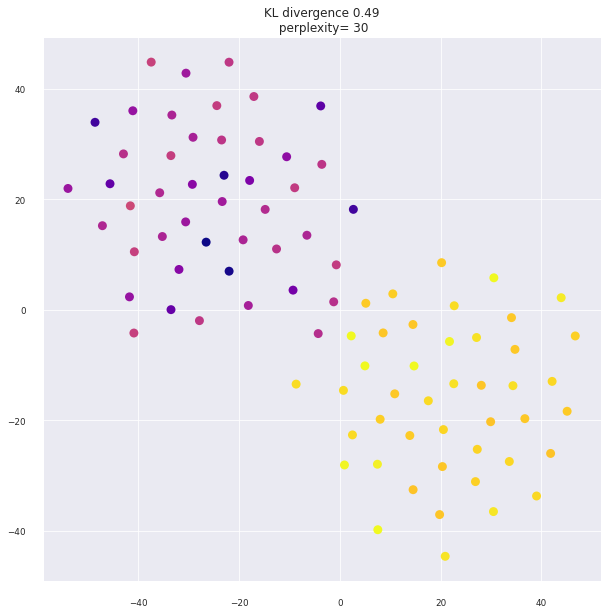

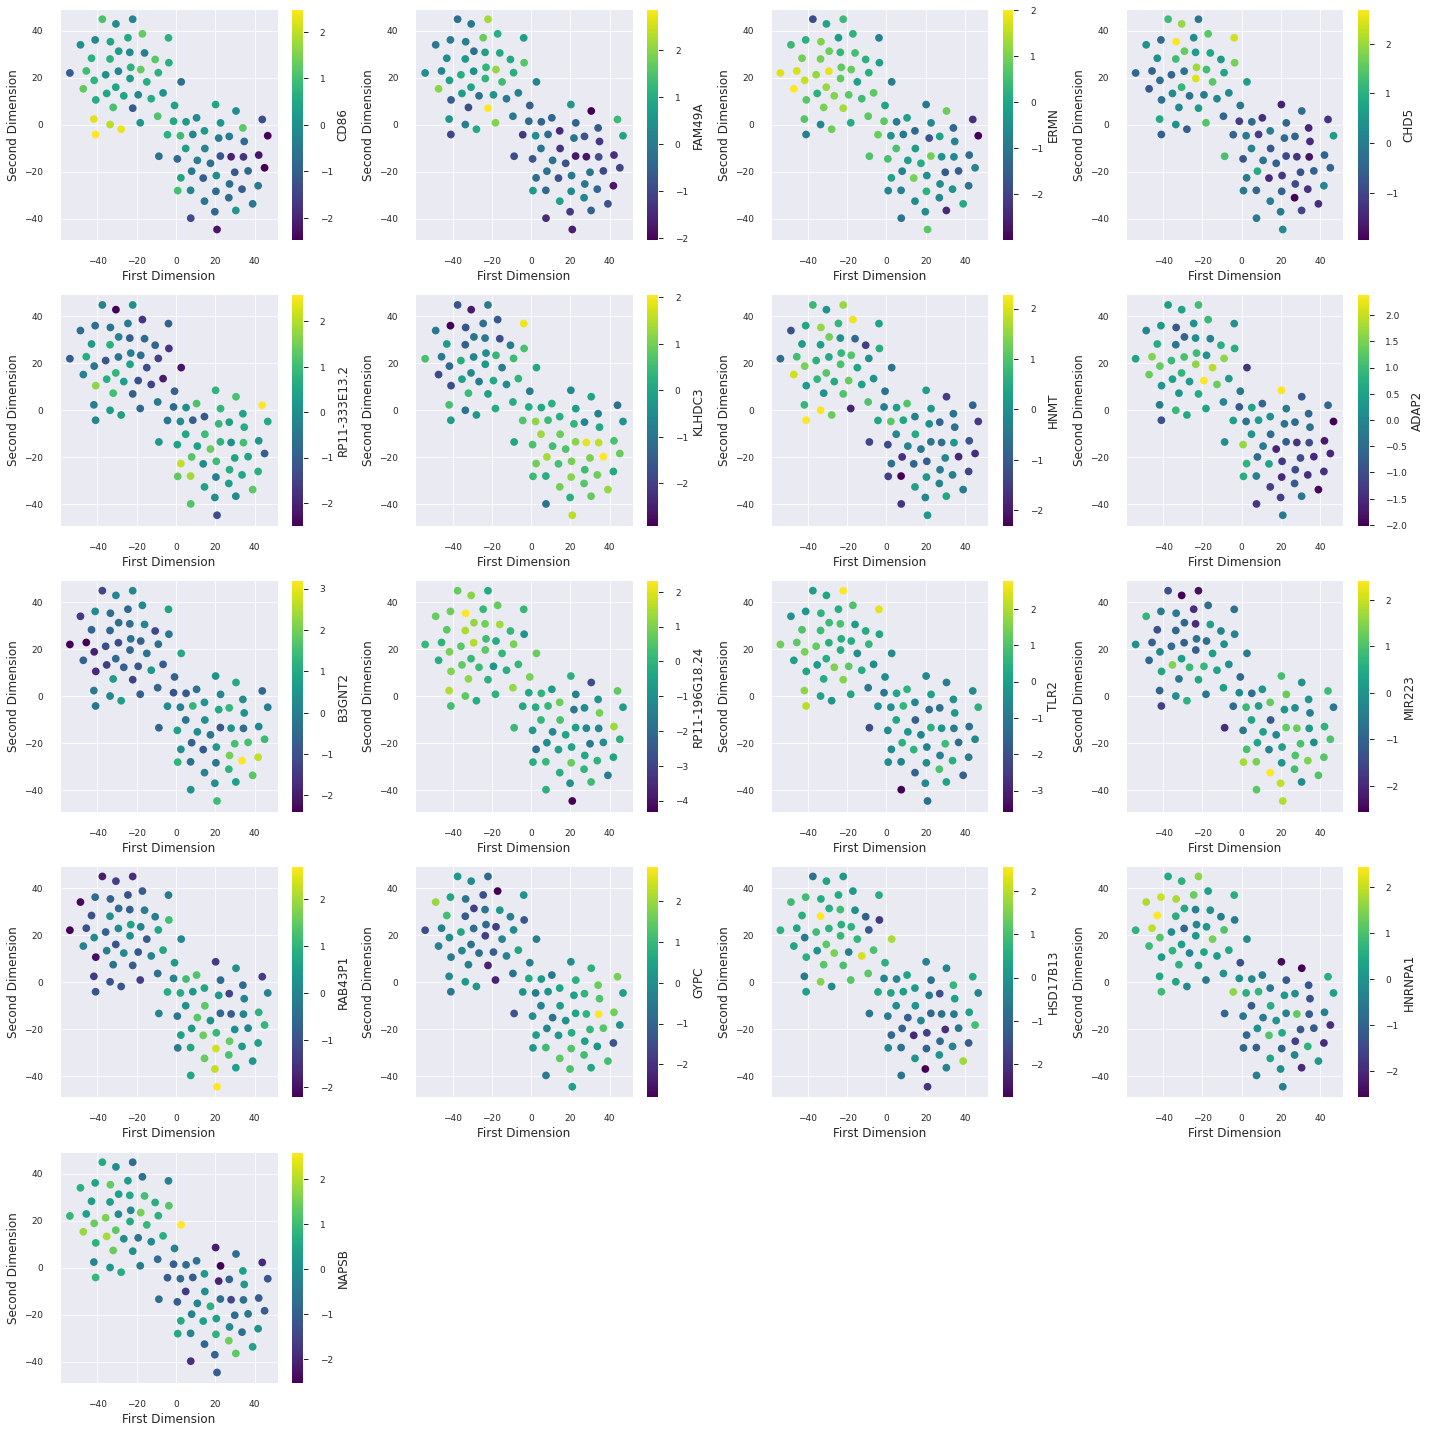

In [31]:
from sklearn.manifold import TSNE

perplexity = 30
tsne=TSNE(n_components=2,perplexity=perplexity).fit(X_im[X_im.columns[:-1]])#create the T-SNE object and fit the data




X_embedded = tsne.embedding_#project the data to the new manifold using the fitted function found before
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_im.auc, s=80, lw=0,cmap='plasma')
plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne.kl_divergence_,perplexity),fontsize=12)
plt.show()

plt.figure(figsize=(20, 20)) 
j = 1
for cl in X_im.columns[:-1]:
    plt.subplot(5,4,j)
    sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_im[cl], s=60, lw=0,cmap='viridis')
    plt.xlabel('First Dimension',fontsize=12)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel('Second Dimension',fontsize=12)
    cb = plt.colorbar(sc)
    cb.set_label(cl,fontsize=12)
    cb.ax.tick_params(labelsize=9)
    #plt.title('tSNE scaled immunology data',fontsize=10)
    j += 1
plt.tight_layout()
plt.show()


Making a direct correspondance between the new and the former basis is not straight forward, since the transformation is non-linear and dependent on the position in the reduced space. Yet to get a feeling about what the features represent you can color code the feature values and see how they change in the transformed space.

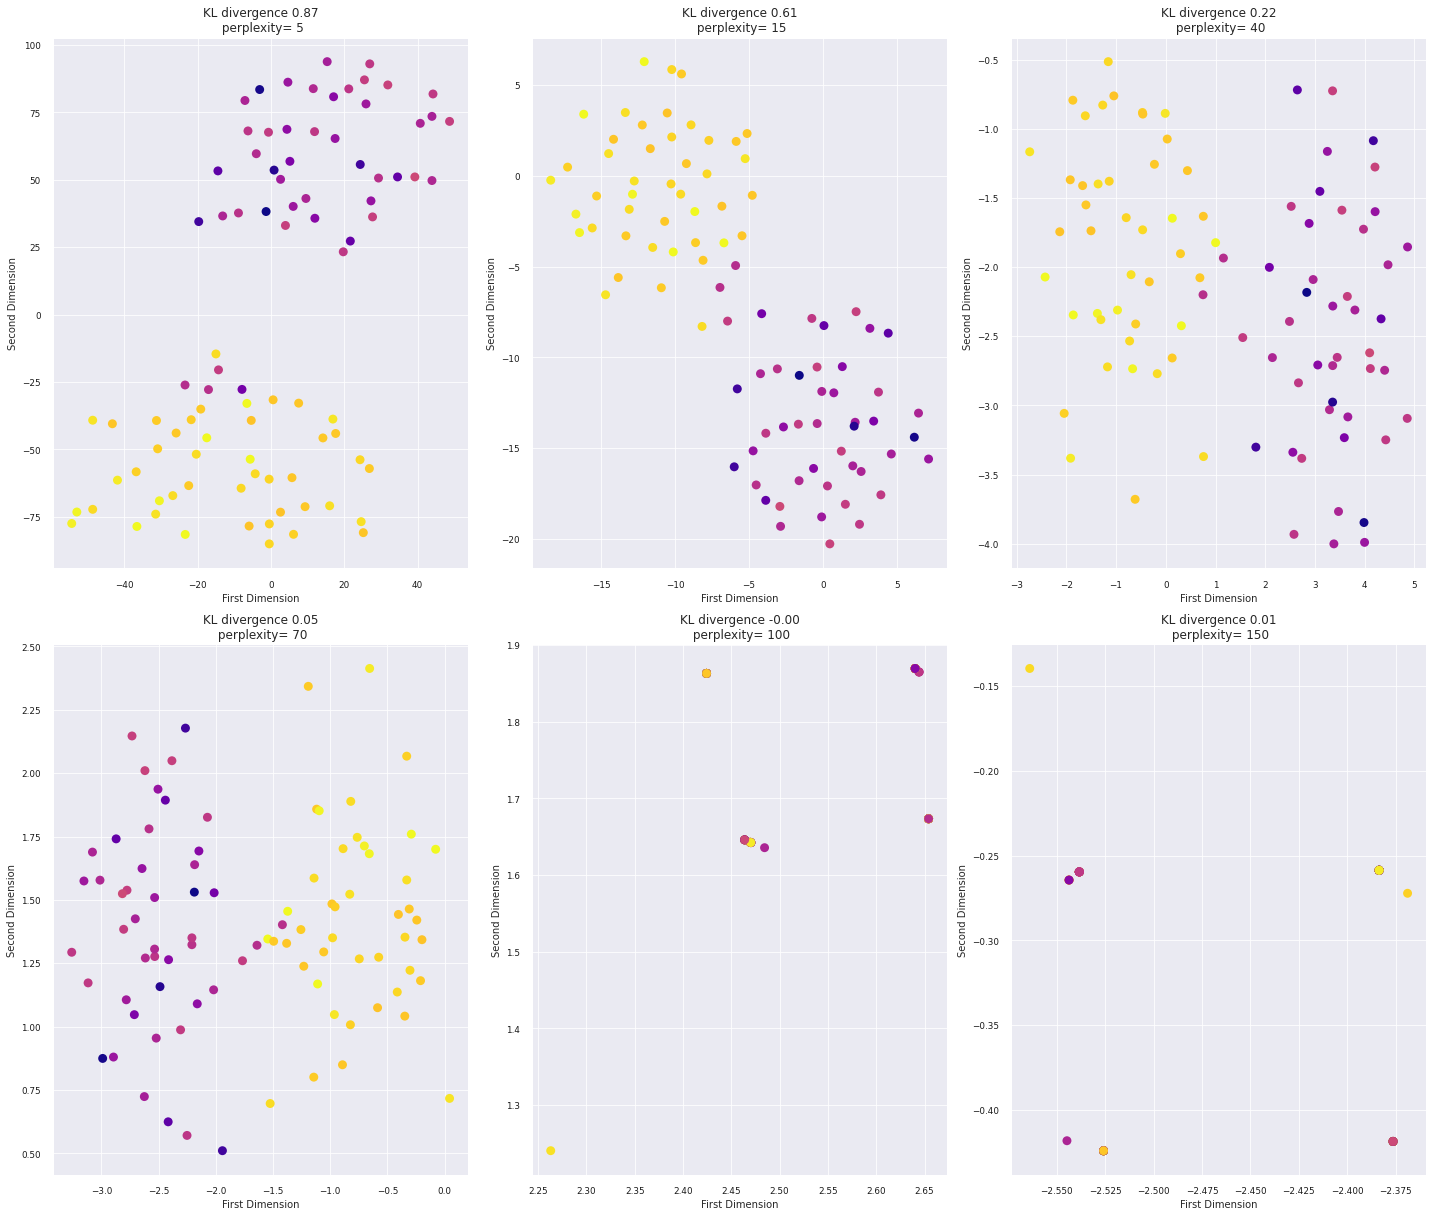

In [23]:
p=[5,15,40,70,100,150] #perplexity parameters to test
plt.subplots(figsize=(20,17))
for j in range(len(p)):
    plt.subplot(2,3,j+1)
    tsne2=TSNE(n_components=2,perplexity=p[j]).fit(X_im[X_im.columns[:-1]])#create the T-SNE object and fit the data

    X_embedded2 = tsne2.embedding_#project the data to the new manifold using the fitted function found before
    plt.scatter(X_embedded2[:, 0], X_embedded2[:, 1], c=X_im.auc, s=80, lw=0,cmap='plasma')
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne2.kl_divergence_,p[j]),fontsize=12)
plt.tight_layout()
plt.show()

You can also see that the perplexity parameter determines the topology of the results. It is your guess to pick a perplexity parameter that gives the best representation of your data. For more details I highly encourage everybody to take a look at this [article](https://distill.pub/2016/misread-tsne/)

# Clustering <a class="anchor" id="fifth-bullet"></a>

Clustering is an unsupervised method that serves many puposes:

<ol>
<li>Pattern detection: discover hidden patterns in your data</li>
<li>Compression: replace all cluster members by one representive</li>
<li>Data augmentation: replace noisy feature vectors by the cluster consensus vector</li>
<li>Dimensionality reduction: replace a feature vector by cluster similarities</li>
<li>Outlier detection: detect feature vectors far away from cluster centers</li>
<li>Semisupervised learning: assign cluster labels to unlabeled cluster members</li>
<li>...</li>
</ol>

If you find some cluster-like structures in your data and if they correspond to one of your hypothesis then you already came a long way. Rarely you can get there in one step, but you need to carefully clean and normalize your data to discover these structures. Be aware that clustering algorithms are not magical techniques that give you a straight answer: you will need to find good hyperparameters for the model to work, and your expertise and understanding of the data is crutial to obtain good results.

## K-means clustering <a class="anchor" id="Kmeans-bullet"></a>

The [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) algorithm is a widely used clustering algorithm. The K-means algorithm aims at finding the right partition of the data ($\pmb{X_1},...,\pmb{X_n}$) into $K$ clusters $\pmb{C}={C_1,...,C_K}$ so that the within cluster sum of squares (inertia) is minimized:

$\pmb{C}=argmin_{\pmb{C}} \sum_{k=1}^{K}\sum_{i \in C_k}||\pmb{X_i}-\pmb{\mu_k}||^2$

$\pmb{\mu_k}=\frac{1}{|C_k|}\sum_{i \in C_k}\pmb{X_i}$

K-means requires the number of clusters as input. The greedy algorithm consists of 3 main parts:
<ol>
<li>Choose $K$ points from $\pmb{X_i}$ as initial values for $\pmb{\mu_k}$. These initial points should be spread out over the dataset</li>
<li>Assignment step: assign each $\pmb{X_i}$ to a cluster $C_k=argmin_{C_k} ||\pmb{X_i}-\pmb{\mu_k}||^2$ </li>
<li>Update step: recalculate $\pmb{\mu_k}=\frac{1}{|C_k|}\sum_{i \in C_k}\pmb{X_i}$</li>
<li>Iterate steps 2 & 3 until convergence</li>
</ol>

For data with a cluster structure K-means complexity is often linear in the number of datapoints $\pmb{X_i}$ and it requires little additional memory. The data can be split into different chunks and the algo still works. Faster versions of the basic algorithm are available, e.g. [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans). This makes it an attractive algorithm for very large datasets.

K-means is a greedy algorithm, i.e. it will only find a local minimum of the inertia. Therefore it is good practice to run the algorithms several times with different initialization (random_state set to different values).

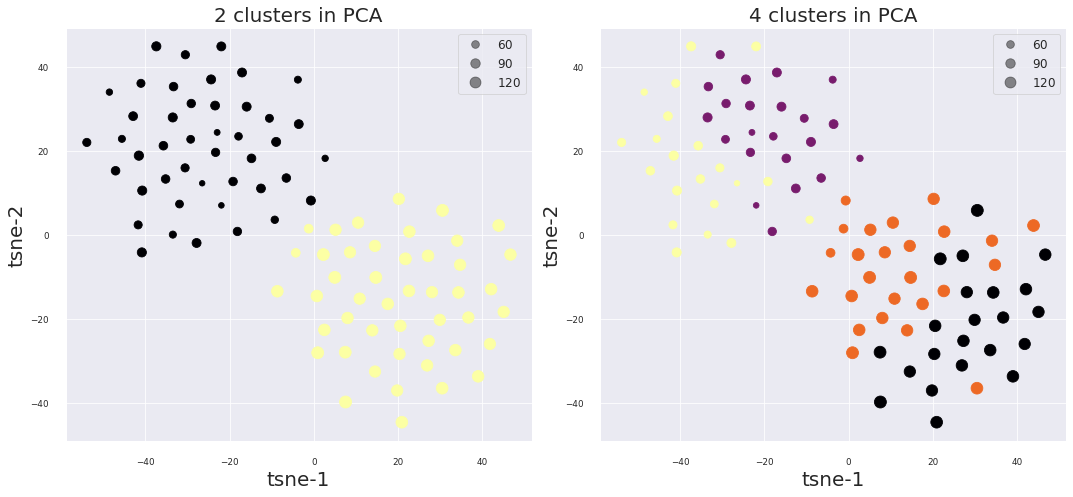

In [32]:
from sklearn import cluster

kmeans_2 = cluster.KMeans(2)#create a K means clustering object that will have 2 clusters
kmeans_2.fit(x_pca)

kmeans_4 = cluster.KMeans(4)#create a K means clustering object that will have 4 clusters
kmeans_4.fit(x_pca)


plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
sc1=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans_2.labels_,s=X_im.auc/2,cmap='inferno')
plt.xlabel('tsne-1',fontsize=20)
plt.ylabel('tsne-2',fontsize=20)
plt.title('2 clusters in PCA',fontsize=20)
plt.legend(*sc1.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)

plt.subplot(1,2,2)
sc2=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans_4.labels_,s=X_im.auc/2,cmap='inferno')
plt.xlabel('tsne-1',fontsize=20)
plt.ylabel('tsne-2',fontsize=20)
plt.title('4 clusters in PCA',fontsize=20)
plt.legend(*sc2.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)
plt.tight_layout()

plt.show()

We see that the number of clusters defines the k-means clustering outcome. It is difficult to say by looking at the t-SNE projections, whether 3 or 7 clusters better reveal underlying patterns. Another way to find the 'optimal' number of clusters is to use any of the clustering quality metrics provided by [skilearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Here we will use the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) metric: 

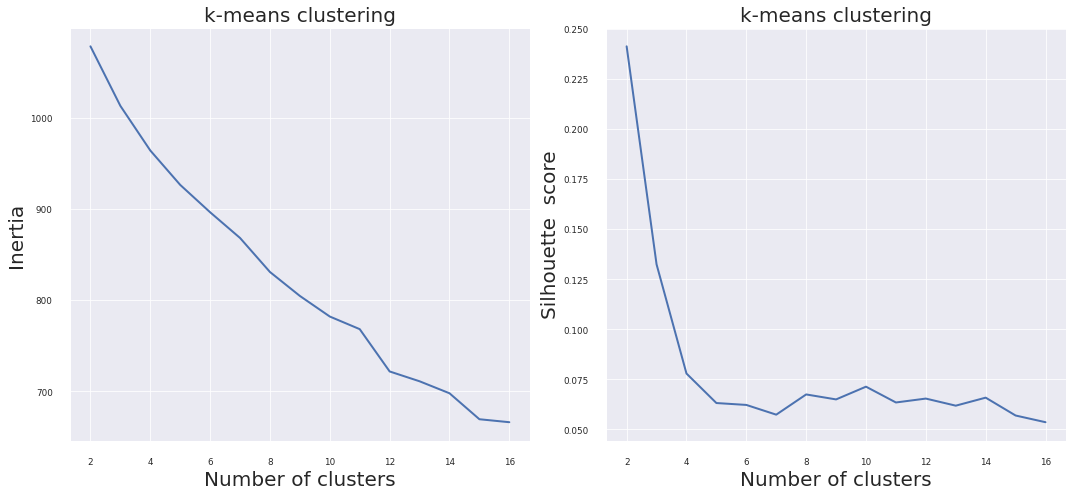

In [33]:
from sklearn import cluster
from sklearn.metrics import silhouette_score

nr_clusters = np.arange(15)+2

inertias = []
silhouettes = []
for n in nr_clusters:
    kmeans = cluster.KMeans(n)
    kmeans.fit(x_pca)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(x_pca,kmeans.labels_))

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, inertias, ls="-", lw=2)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Inertia',fontsize=20)
plt.title('k-means clustering',fontsize=20)

plt.subplot(1,2,2)
plt.plot(nr_clusters, silhouettes, ls="-", lw=2)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Silhouette  score',fontsize=20)
plt.title('k-means clustering',fontsize=20)

plt.tight_layout()
plt.show()

The plot to the left gives us the inertia as a function of the number of clusters (remember the inertia is the sum of squares, the score k-means is trying to minimize). The inertia decreases as the number of clusters increases (which is expected) and does not give us much information about the best cluster count to use. The silhouette score is more informative (left plot). 

The silhouette score is calculated using the mean intra-cluster distance $a$ and the mean nearest-cluster distance $b$ for each sample. The Silhouette Coefficient for a sample is $SC=\frac{(b - a)}{max(a, b)}$, where $b$ is the distance between a sample and the nearest cluster that the sample is not a part of. The skilearn function returns the mean Silhouette score over all samples for a given clustering result. To obtain the values for each sample, use silhouette_samples. $SC$ is always between -1 (bad clustering) and 1 (perfect clustering).

We see that $SC$ proposes $K=2$ .

**Exo.**
Use the single cell dataset from [Patel et al. Science 2014](https://science.sciencemag.org/content/344/6190/1396).



In [34]:
df = pd.read_csv('../data/Patel.csv',sep=',', header=0)

df = df.set_index(df.iloc[:,0], inplace=False)
df = df.iloc[:,1:]

X = df.T

print('the data link 430 samples to 5948 genes',X.shape)

patients = list(map(lambda s: s[0:5],df.columns)) #take first 5 letter for patient id

color_dict={'MGH26':'blue', 'MGH28':'orange', 'MGH29': 'red', 'MGH30': 'green', 'MGH31': 'pink'}
colors=[color_dict[p] for p in patients]

the data link 430 samples to 5948 genes (430, 5948)


In [35]:
df

MGH264_A01  MGH264_A02  MGH264_A03  MGH264_A04  MGH264_A05  \
Unnamed: 0                                                               
A2M          -3.801470   -3.801470   -3.801470   -3.801470   -3.801470   
AAAS         -3.889900   -3.889900   -3.889900   -3.889900    3.742495   
AAK1         -3.985616   -3.158708    1.733125   -1.665669   -2.166992   
AAMP          2.651558    2.358992   -5.820241    3.514271   -5.820241   
AARS          2.170748   -6.041792   -6.041792   -6.041792    2.094729   
...                ...         ...         ...         ...         ...   
ZWILCH       -1.558581   -1.558581   -1.558581   -1.558581   -1.558581   
ZXDC         -1.920271   -3.068620    0.174665   -3.068620    4.590946   
ZYG11B        3.007439    2.539560   -0.165409   -1.884744   -0.128456   
ZYX          -2.509017    2.164481    0.734268   -2.509017   -2.509017   
ZZZ3         -2.149696   -2.149696   -2.149696   -2.149696   -2.149696   

            MGH264_A06  MGH264_A07  MGH264_A08  MGH264_A10  MGH264_A11  ...  \
Unnamed: 0                                                              ...   
A2M          -1.987700   -3.801470   -3.801470   -3.801470   -3.801470  ...   
AAAS         -3.889900   -3.889900   -3.889900   -3.889900    4.316243  ...   
AAK1          4.691156    2.656469   -1.914759    0.483560    1.828663  ...   
AAMP         -4.006471    2.207608    2.417820   -5.820241    2.140173  ...   
AARS         -3.449348   -6.041792    3.162904   -6.041792   -6.041792  ...   
...                ...         ...         ...         ...         ...  ...   
ZWILCH       -1.558581   -1.558581   -1.558581   -1.558581   -1.558581  ...   
ZXDC         -3.068620    3.617386    1.829214   -3.068620    5.157919  ...   
ZYG11B       -3.421540    1.384471    5.237998   -0.775154    4.710859  ...   
ZYX          -2.509017   -2.509017   -2.509017    1.953289    5.078266  ...   
ZZZ3         -2.149696   -2.149696    6.779879   -2.149696    4.977025  ...   

            MGH31_H02  MGH31_H04  MGH31_H05  MGH31_H06  MGH31_H07  MGH31_H08  \
Unnamed: 0                                                                     
A2M         -1.297972   7.171407  -3.801470  -3.801470  -1.102296   0.049047   
AAAS        -3.889900  -3.889900  -3.889900  -3.889900   4.405524   3.802559   
AAK1        -0.608787   0.255614   4.876503   3.098786   2.664671   0.569558   
AAMP         3.348386   1.450563   3.080595   2.273674   1.854226   2.277677   
AARS         1.000156   2.679441  -6.041792   3.633562   1.593344  -3.588918   
...               ...        ...        ...        ...        ...        ...   
ZWILCH       0.944916   6.091143  -1.558581   5.722216  -1.558581   2.681750   
ZXDC        -0.565122   4.656027   1.184275  -3.068620   1.138638  -0.615746   
ZYG11B       2.526070   3.055766  -1.041219   1.151808   4.713959   4.239365   
ZYX          3.901570   3.162101  -2.509017   2.730778  -2.509017  -2.509017   
ZZZ3        -2.149696   5.052851   7.743945   6.193357  -2.149696  -2.149696   

            MGH31_H09  MGH31_H10  MGH31_H11  MGH31_H12  
Unnamed: 0                                              
A2M         -3.801470  -0.264648  -3.801470  -3.801470  
AAAS        -3.889900  -3.889900   3.616363  -1.258929  
AAK1         3.696882  -1.092769   2.991430   2.012230  
AAMP         2.838116  -1.215363   1.747092   1.652332  
AARS        -0.613635  -6.041792   3.499675   3.667814  
...               ...        ...        ...        ...  
ZWILCH      -1.558581  -1.558581  -1.558581   3.194817  
ZXDC         4.769359  -3.068620  -3.068620   5.482122  
ZYG11B       5.488785  -0.541107  -1.979868   2.563348  
ZYX          4.172381  -2.509017  -2.509017   2.902254  
ZZZ3         0.851999  -2.149696  -2.149696   4.244524  

[5948 rows x 430 columns]

So you have a single cell RNA seq from different patient and each patient have different cell type


Answer the follow questions:

    1) Plot a heatmap of the data
    2) Plot a PCA (tissue space) plot with patient color code and compare to Figure 1 in the paper
    3) Use t-SNE (tissue space) to reduce to 2 dimensions (perplexity=5) and plot the data with patient color code
    4) Transpose the dataframe (to be on gene space) and perform k-means clustering (5 for 5 patients)
    5) Vizualize clusters in t-SNE projection 

(430, 5948)


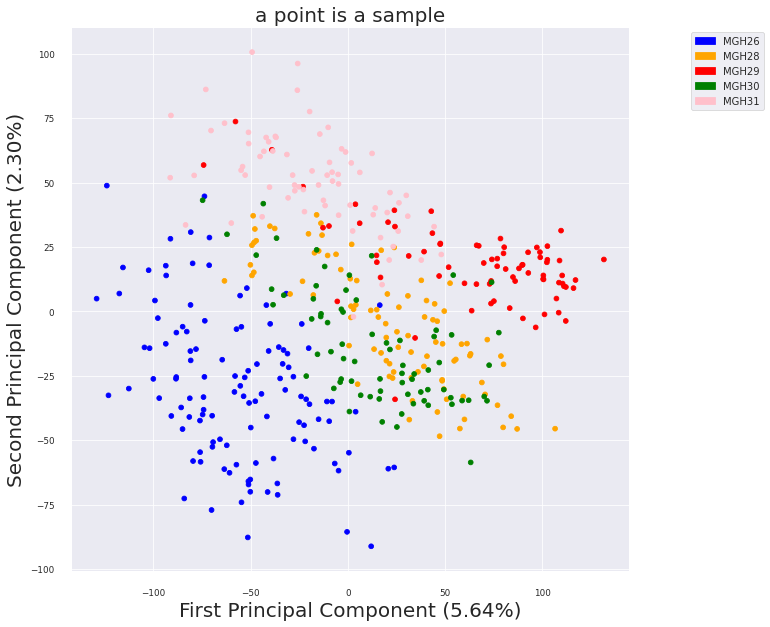

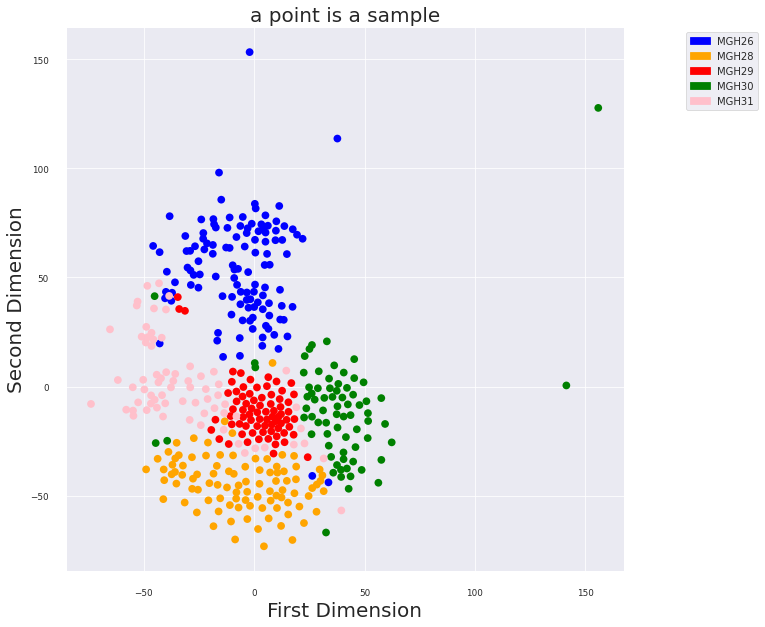

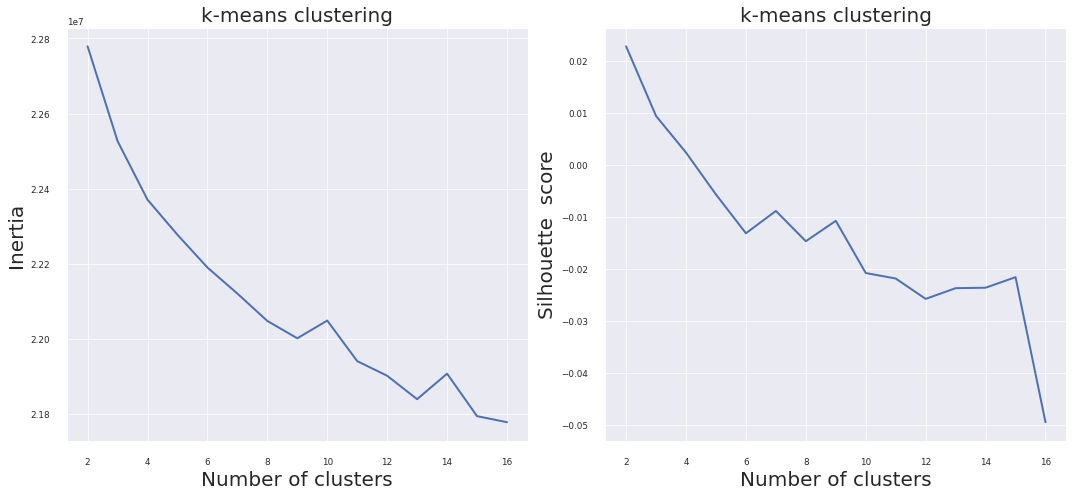

Counter({1: 3118, 0: 2830})
[0 0 1 ... 1 0 1]


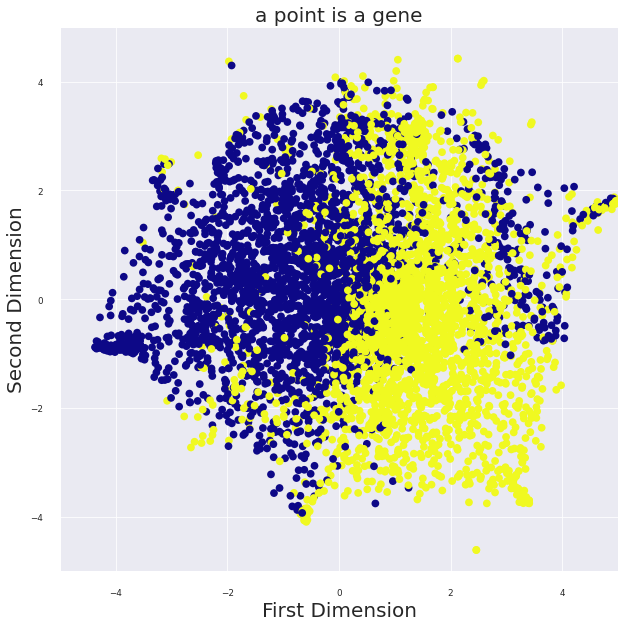

In [36]:
from collections import Counter
import matplotlib.patches as mpatches

pca_exo_sample = PCA() #create a PCA object

pca_exo_sample.fit(X)
x_pca_exo_sample = pca_exo_sample.transform(X)

var_explained_exo_sample=pca_exo_sample.explained_variance_ratio_
list_patches=[]
for s in color_dict.keys():
    list_patches.append(mpatches.Patch(color=color_dict[s], label=s))
plt.figure(figsize=(10,10))
plt.title('a point is a sample',fontsize=20)
plt.scatter(x_pca_exo_sample[:,0],x_pca_exo_sample[:,1],c=colors)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(var_explained_exo_sample[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(var_explained_exo_sample[1]*100))
plt.legend(handles=list_patches,fontsize=10,bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))
tsne_exo_sample=TSNE(n_components=2,perplexity=20).fit(X)
X_embedded_exo_sample = tsne_exo_sample.embedding_

plt.figure(figsize=(10,10))
plt.title('a point is a sample',fontsize=20)
plt.scatter(X_embedded_exo_sample[:, 0], X_embedded_exo_sample[:, 1], c=colors, s=60, lw=0)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(handles=list_patches,fontsize=10,bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

X_genes = X.T

pca_exo_genes = PCA() #create a PCA object

pca_exo_genes.fit(X_genes)
x_pca_exo_genes = pca_exo_genes.transform(X_genes)

print(X.shape)

nr_clusters = np.arange(15)+2

inertias = []
silhouettes = []
for n in nr_clusters:
    kmeans = cluster.KMeans(n)
    kmeans.fit(x_pca_exo_genes)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(x_pca_exo_genes,kmeans.labels_))

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, inertias, ls="-", lw=2)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Inertia',fontsize=20)
plt.title('k-means clustering',fontsize=20)

plt.subplot(1,2,2)
plt.plot(nr_clusters, silhouettes, ls="-", lw=2)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Silhouette  score',fontsize=20)
plt.title('k-means clustering',fontsize=20)

plt.tight_layout()
plt.show()

kmeans_exo_genes = cluster.KMeans(2)
kmeans_exo_genes.fit(x_pca_exo_genes)
cl_labels_exo_genes = kmeans_exo_genes.labels_

print(Counter(cl_labels_exo_genes))

tsne_exo_genes=TSNE(n_components=2,perplexity=30).fit(X_genes)
X_embedded_exo_genes = tsne_exo_genes.embedding_

print(kmeans_exo_genes.labels_)
plt.figure(figsize=(10,10))
plt.title('a point is a gene',fontsize=20)
plt.scatter(X_embedded_exo_genes[:, 0], X_embedded_exo_genes[:, 1], c=cl_labels_exo_genes, s=60, lw=0, cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.show()

## Hierarchical clustering <a class="anchor" id="HC-bullet"></a>

Hierarchical clustering is an algorithms that iteratively merges data points or groups of data points. It starts with $N$ clusters, one cluster per data point. It first calculates the pairwise distances between all clusters. It then selects the two closests clusters and merges them into a new cluster. Next it recalculates the distances between the newly formed cluster and the remaining clusters. It repeats these steps until a specified number of clusters is reached or until all distances between clusters are larger than a specified threshold.

Since this type of algorithm requires pairwise distance calculations and does this up to $N$ times until all clusters are merged, the complexity of the algorithms is $N^3$. This is often too slow for large datasets. The algorithms can be accelarated by speeding up disnace calculations or initialize the clusters with a coarse k-means clustering.

The main advantage of the algorithm is the visualization of the results as dendograms and the easy interpretability of the results.

![Pca](../images/Hierachi.png)

**Back to the AML example**

No handles with labels found to put in legend.


<Figure size 2160x1440 with 0 Axes>

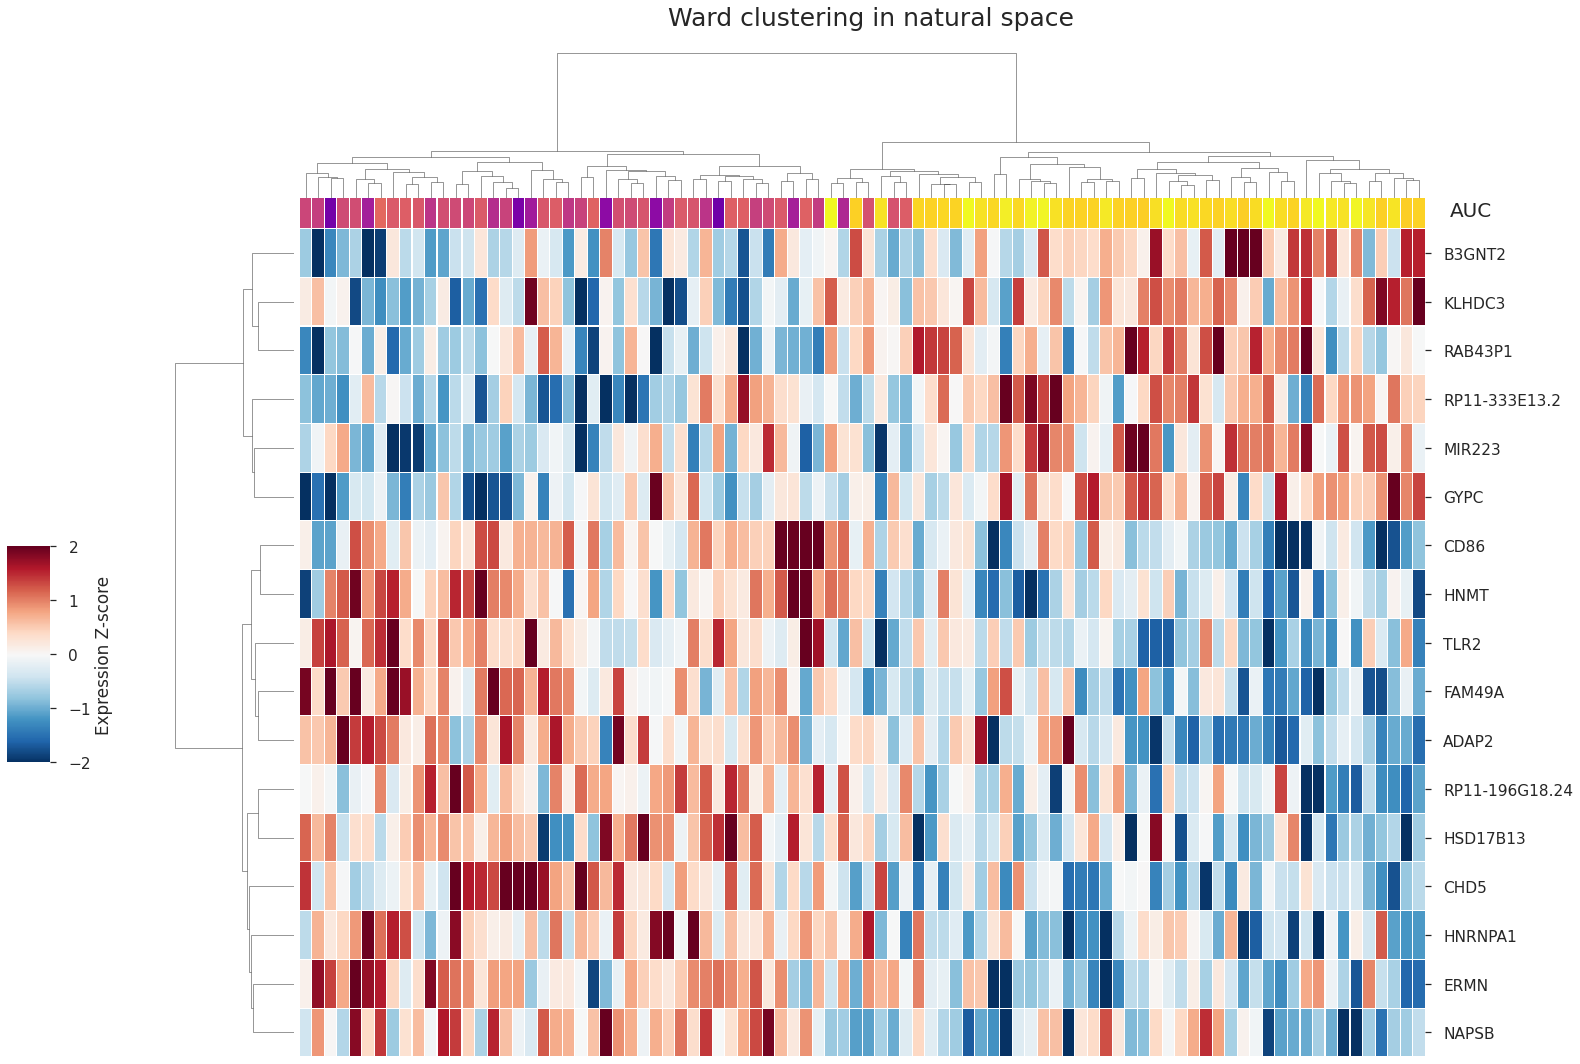

In [41]:
import matplotlib
sns.set(font_scale=1.4)
plt.figure(figsize=(30,20))
cmap = matplotlib.cm.get_cmap('plasma')
col_col=[cmap(x/max(list(X_im.auc))) for x in list(X_im.auc)]
a=sns.clustermap(X_im[X_im.columns[:-1]].T,figsize=(20,15),cmap='RdBu_r',vmin=-2,vmax=2,method='ward',
                 col_colors=col_col,dendrogram_ratio=(.1, .15),linewidths=.05,cbar_pos=(-.1, .32, .03, .2),
                cbar_kws={'label':'Expression Z-score'})
b=a.ax_heatmap
b.set_xticks([])
l2=b.legend(loc='upper left',bbox_to_anchor=(1.01,1.05),frameon=False)
l2.set_title(title='AUC',prop={'size':20})
a.fig.suptitle('Ward clustering in natural space',fontsize=25,y=1.02) 
plt.show()

Next we would like perform hierachical clustering using the sklearn [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class. We  will test an array of  numbers of clusters in order to choose the optimal number of clusters.

Counter({0: 48, 1: 42})


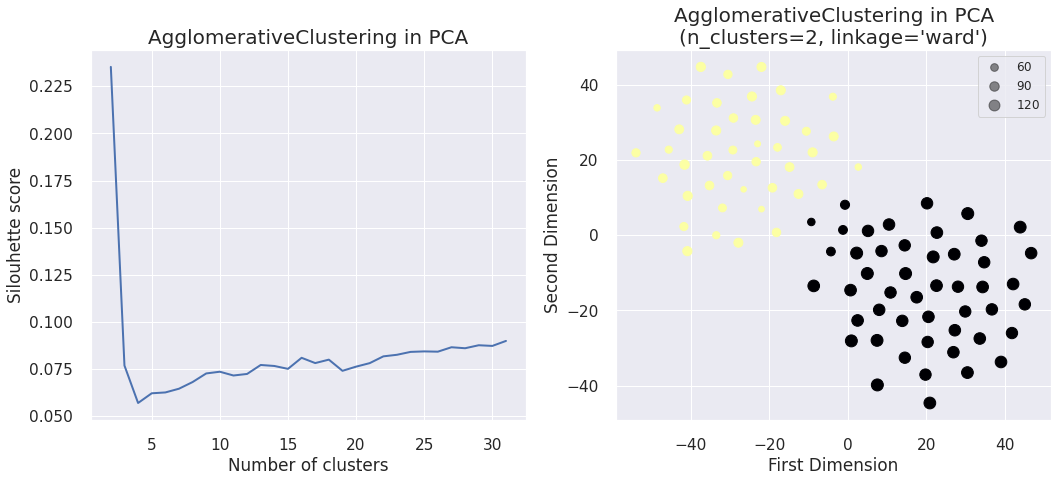

In [47]:
from sklearn.metrics import davies_bouldin_score
from collections import Counter

nr_clusters = np.arange(30)+2

scores = []
best_labels = []
best_score = -10
best_nr_clusters = 0

for n in nr_clusters:
    hc = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    hc.fit(x_pca)
    score=silhouette_score(x_pca,hc.labels_)
    
    if score > best_score:
        best_labels = hc.labels_
        best_score = score
        best_nr_clusters = n
        
    scores.append(score)

print(Counter(best_labels))
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, scores, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silouhette score')
plt.title('AgglomerativeClustering in PCA',fontsize=20)


plt.subplot(1,2,2)
sc=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=best_labels,s=X_im.auc/2,cmap='inferno')
plt.legend(*sc.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('AgglomerativeClustering in PCA\n(n_clusters={0}, linkage=\'ward\')'.format(best_nr_clusters),fontsize=20)
plt.tight_layout()
plt.show()

In [106]:
#Just some code to plot the dendrogram that will be explained below
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

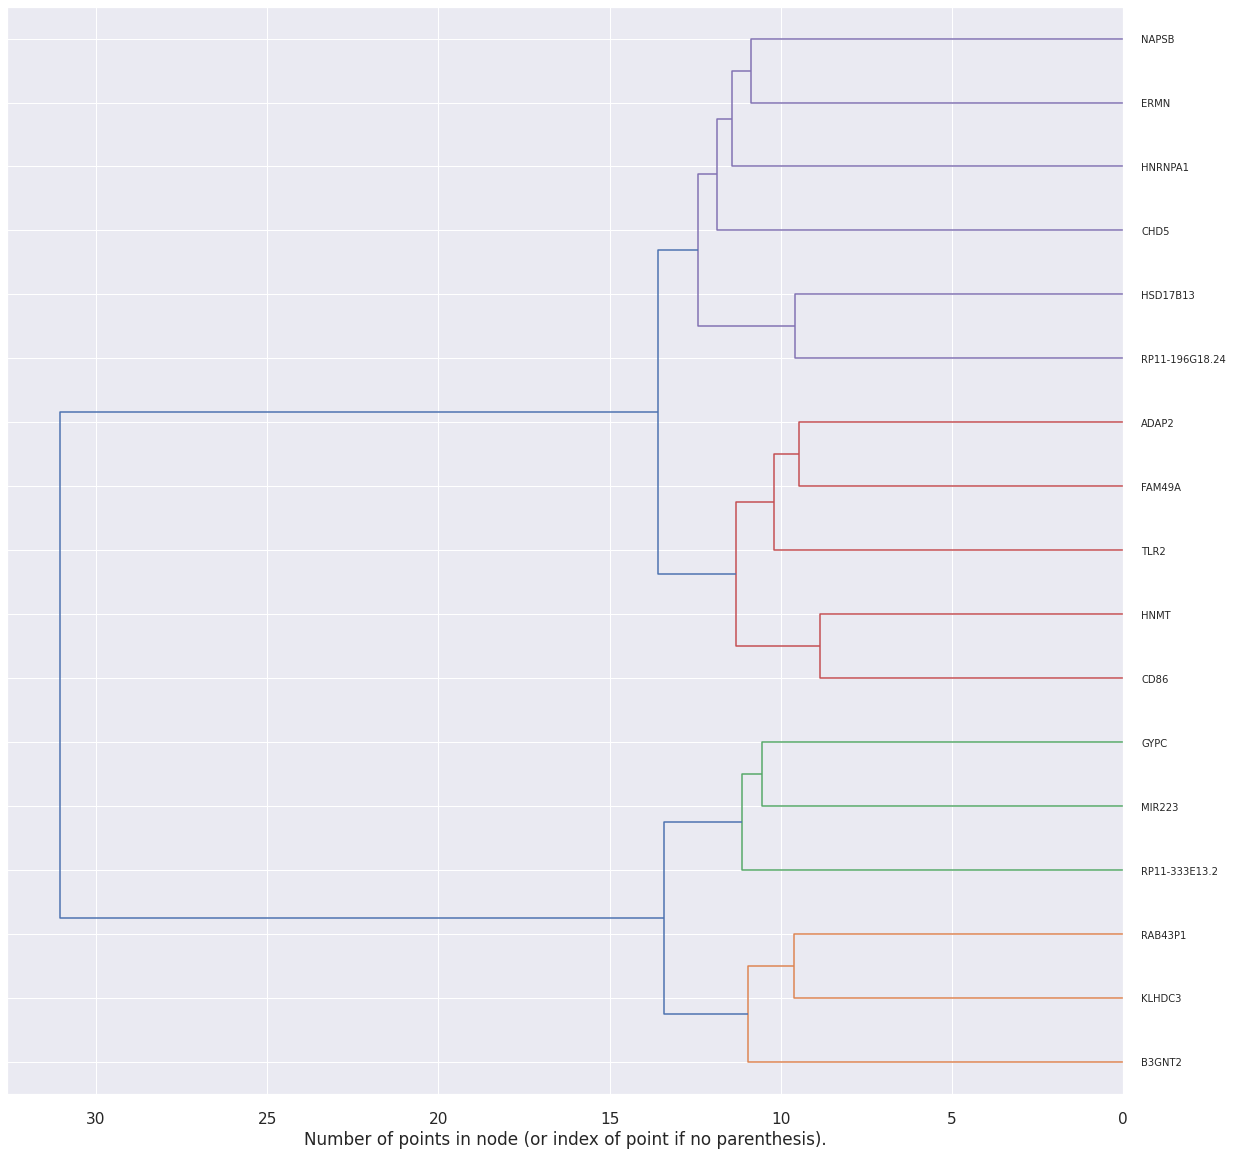

In [107]:
from sklearn import cluster
pylab.rcParams['figure.figsize'] = 20, 20
dendro = cluster.AgglomerativeClustering(
        n_clusters=None,distance_threshold=0, linkage='ward')#here n_cluster = none because I want to explore the link
#between threshold choice and number of clusters
dendro.fit(X_im[X_im.columns[:-1]].T)
plot_dendrogram(dendro,
                color_threshold=13,
                labels=X_im[X_im.columns[:-1]].T.index, 
                orientation='left',leaf_font_size=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The dendogram is the representation of the effect of your-cut off to define a cluster. For example if you decide that your threshold is going to be 15 : then you only have two clusters. If you change it to 10 you will have 3 clusters. If you put it to 0 : each point is a cluster!

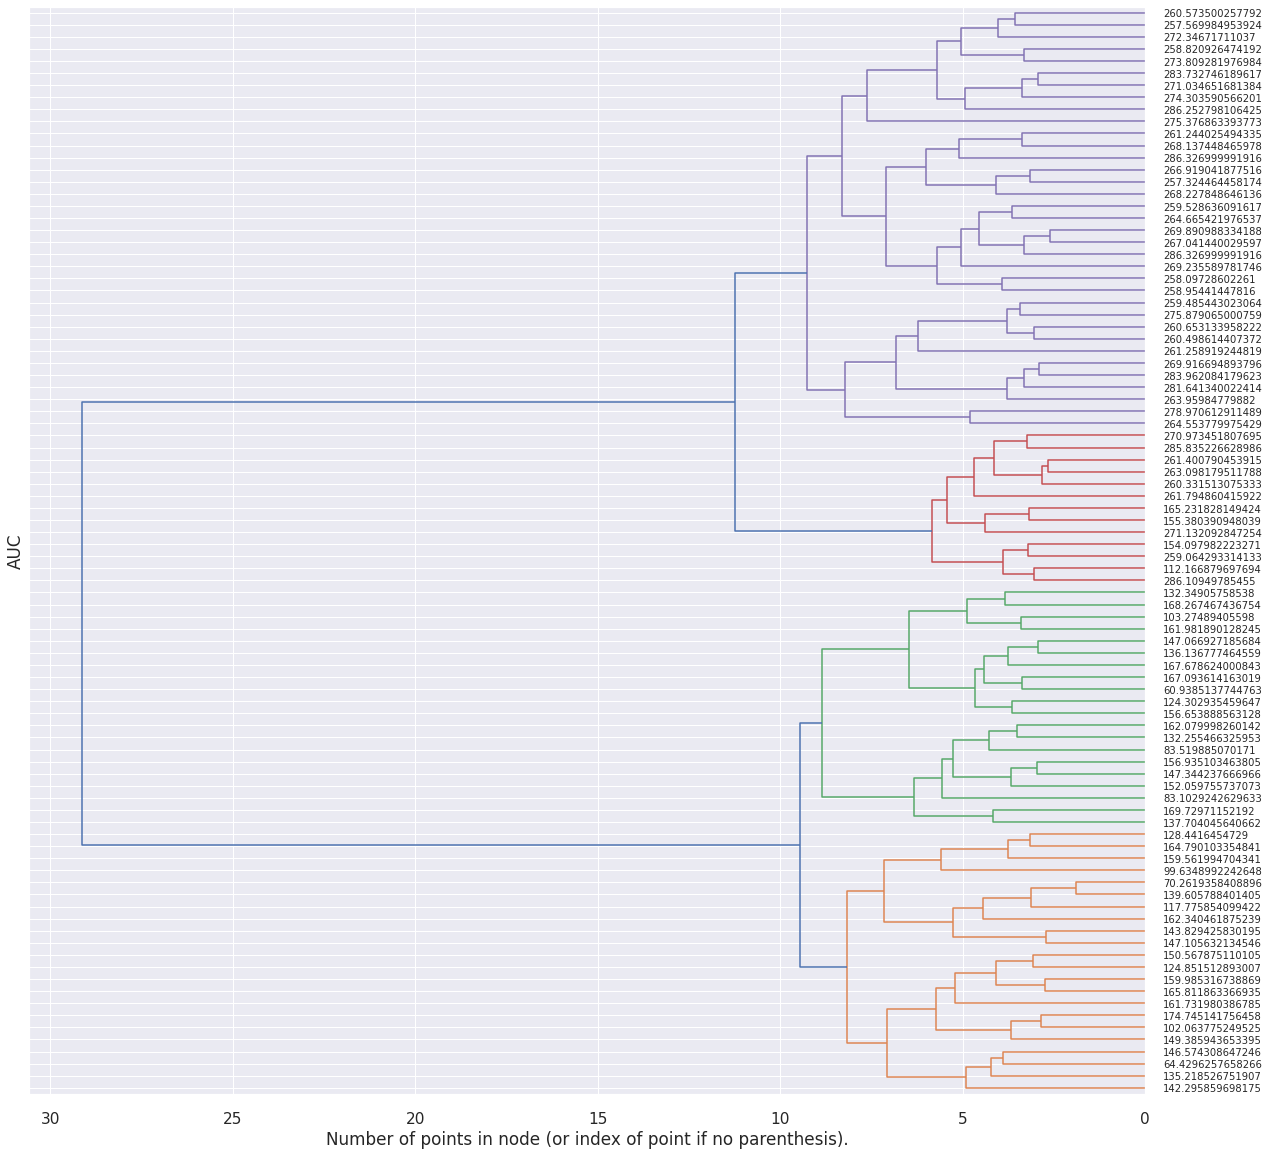

In [108]:
pylab.rcParams['figure.figsize'] = 20, 20
dendro = cluster.AgglomerativeClustering(
        n_clusters=None,distance_threshold=0, linkage='ward')#here n_cluster = none because I want to explore the link
#between threshold choice and number of clusters
dendro.fit(X_im[X_im.columns[:-1]])
plot_dendrogram(dendro,
                color_threshold=9.4,
                labels=list(X_im.auc), 
                orientation='left',leaf_font_size=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("AUC")
plt.show()

## DBSCAN <a class="anchor" id="DBSCAN-bullet"></a>

DBSCAN - Density-Based Spatial Clustering of Applications with Noise [Ester et al., Proc KDD, 1996](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220) finds core points of high density and expands clusters from them. It works well for data which contains clusters of similar density. The algorithm starts by defining core points (points that are densely packed : at least 'min_samples' points within a distance 'eps' from each other). Then it expands a seed cluster $C_k$ by adding a point $p_j$ to the cluster if there a point $p_{l} \in C_k$ with $dist(p_j-p_{l})<\epsilon$. Points that cannot be linked to a seed cluster are marked as outliers.

![Pca](../images/db.png)

DBSCAN The average run time complexity of DBSCAN is $O(nlogn)$ (worst case $O(n^2)$), which makes attractive for large datasets.

First, we need to have an idea in which range $\epsilon$ will be:

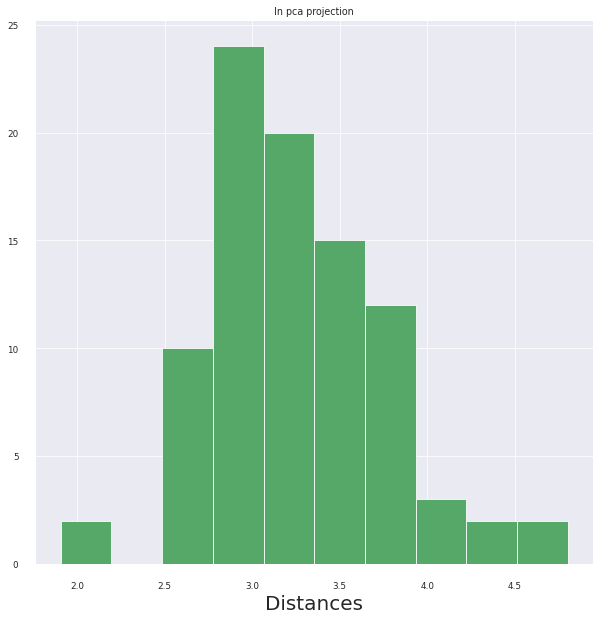

In [39]:
from sklearn.metrics import pairwise_distances

D = pd.DataFrame(pairwise_distances(x_pca, metric='minkowski', p=2.))
dists = D[D>0].min(axis=1) # get nearest neighbor distances

plt.figure(figsize=(10,10))
plt.hist(dists, color="g",bins=10)
plt.xlabel("Distances")
plt.title('In pca projection')
plt.show()

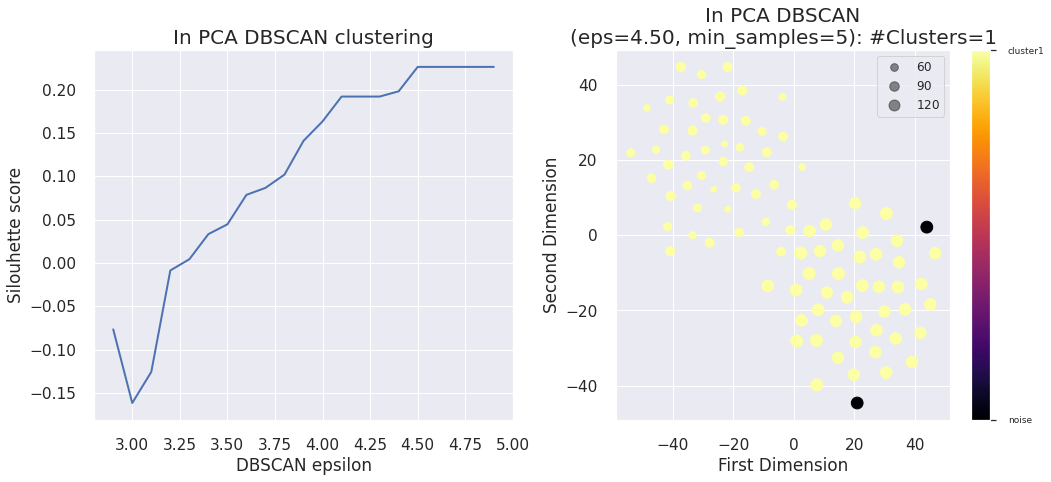

In [49]:
from sklearn import cluster

eps = np.arange(2, 5, 0.1)
nr_samples = np.arange(5,30,5)

scores = []
best_labels = []
best_score = -np.infty
best_eps = 0
best_nr_clusters = 0
best_min_samples = 0

for e in eps:
    best_eps_score = -np.infty
    for n in nr_samples:
        dbscan = cluster.DBSCAN(eps=e, min_samples=n, p=2)
        dbscan.fit_predict(x_pca)
        try:
            score=silhouette_score(x_pca,dbscan.labels_)
            if score > best_eps_score:
                best_eps_score = score

            if score > best_score:
                best_labels = dbscan.labels_
                n_clusters_ = len(set(best_labels)) - (1 if -1 in best_labels else 0)
                best_score = score
                best_eps = e
                best_nr_clusters = n_clusters_
                best_min_samples = n
                col=[b if b>=0 else -1 for b in best_labels]
        except:
            None

    scores.append(best_eps_score)

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(eps, scores, ls="-", lw=2)
plt.xlabel('DBSCAN epsilon')
plt.ylabel('Silouhette score')
plt.title('In PCA DBSCAN clustering',fontsize=20)

plt.subplot(1,2,2)
sc=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=col,s=X_im.auc/2,cmap='inferno')
plt.legend(*sc.legend_elements("sizes", num=4, alpha=0.5),fontsize=12,loc='best')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('In PCA DBSCAN\n(eps={0:.2f}, min_samples={1}): #Clusters={2}'.format(best_eps,best_min_samples,
                                                                       best_nr_clusters),fontsize=20)
cb = plt.colorbar(sc,ticks=np.arange(-1,len(set(col))-1,1))
cb.ax.tick_params(labelsize=9)
cb.ax.set_yticklabels(['noise']+['cluster' +str(i) for i in np.arange(1,len(set(col)),1)])
plt.tight_layout()

plt.show()

# Appendix <a class="anchor" id="appendix-bullet"></a>

### 'Whiten' a data matrix <a class="anchor" id="whiten-bullet"></a>

'Whitening' is a process to reduce correlations between columns in a $NxM$ data matrix $\pmb{X}$ ($N$ samples and $M$ features). It uses PCA to transform $\pmb{X}$ into $\pmb{X'}$ with $\pmb{X'}^T\pmb{X'}=\pmb{\mathbb{1}}$. The process consists of 2 steps:

<ol>
<li>Zero centering around column means: $x_{ij}=x_{ij}-\frac{1}{N}\sum_{k=1}^{N}x_{kj}$</li>
<li>Rotation to PC basis and scaling: $\pmb{X'}=\pmb{X}\pmb{W}\pmb{D^{-\frac{1}{2}}}$, where $\pmb{W}$ is the matrix containing the PC's and D a diagonal matrix containing the variances. This transformation projects on the PC basis vectors and devides by the standard deviations.</li>
</ol>



### UMAP <a class="anchor" id="umap-bullet"></a>

t-SNE has some disadvantages:

<ol>
<li>Speed. t-SNE computations takes a long time for large datasets</li>
<li>Dimensions. t-SNE is not applicable for more than 2-3 dimensions</li>
<li>Global Structure: t-SNE preserves local but not global structure</li>
</ol>

There comes UMAP ([McInnes et al.,arxiv, 2018](https://arxiv.org/abs/1802.03426)), which you probably know from single cell RNA-seq papers. It is similar to t-SNE, but differs in some important details, which make it faster, applicable to more than 2 dimensions and preserve the global structure better. Here is how it works:

UMAP assumes an exponential weight between the high dimensional data points: 

$\mu_{ij}=e^{-\frac{d(x_{i},x_{j})-\rho_i}{\sigma_i}}$

$\rho_i$ is the distance $d(x_{i},x_{k})$ of $x_{i}$ to its nearest neighbor $x_{k}$. Let $NN(i,n)$ be the set of $n$ nearest neighbors of $x_i$. $sigma_i$ is chosen such that $\sum_{k \in NN(i,n)}\mu_{ik} = log_2(n)$. In contrast to t-SNE the weights are not normalized, which saves computation time.

Next the weights $\mu_{ij}$ are turned into a weighted adjacency matrix and spectral clustering is used to find an initial embedding of the data points in the low dimensional space.

For the representation in the low dimensional space, UMAP uses a heavy tailed weight:

$\nu_{ij} = (1 + a(|x_i − x_j|_2^2)^b)^{−1}$

UMAP determines the parameters $a$ and $b$ by a least square fitting procedure. As a similarity measure between the $\mu_{ij}$ and $\nu_{ij}$ distributions it uses:

$C=-\sum_{i}\sum_{j}[\mu_{ij}log(\nu_{ij}) + (1-\mu_{ij})log(1-\nu_{ij})]$

UMAP uses stochastic gradient descent algorithm to minimize $C$. The spectrum clustering initialisation as well as the second term in $C$ are supposed to provide a better embedding for distant clusters compared to t-SNE.

UMAP implements an efficient nearest neighbor search and has an overall complexity of $O(N^{1.14})$.

The main input parameters for UMAP are

<ol>
<li>'n_components': dimension of the embedding</li>
<li>'n_neighbors': numer of nearest neigbors to consider (corresponds to $n$ in the text)</li>
<li>'min_dist': points in embedded space need to be separeted by a distance of at least 'min_dist'</li>
<li>'metric': metric to be used for measuring distances (corresponds to $d(x,y)$ in the text)</li>
</ol>

Further information and tutorials you can find un the [UMAP page](https://umap-learn.readthedocs.io/en/latest/index.html).

In [53]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 644 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 822 kB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=f3b1261f42e13a8554625c05d28256740f4dce18ab1afdcaf139582b2d1cd6a4
  Stored in directory: /home/seb/.cache/pip/wheels/95/85/b7/b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for pynndescent: filename=pynndescent-0.5.2-py3-none-any.whl size=51349 sha256=85610111e5a97f8cb1d8b6d682f13d0bf701c9f54b4dd0960b87d23e10b15194
  Stored in directory: /home/seb/.cache/pip/wheels/bb/81/5d/c78c8f15f3c815197129f91ec435d8ae0bb0a7a856d962c3ce
Successfully built umap-learn pynndescent


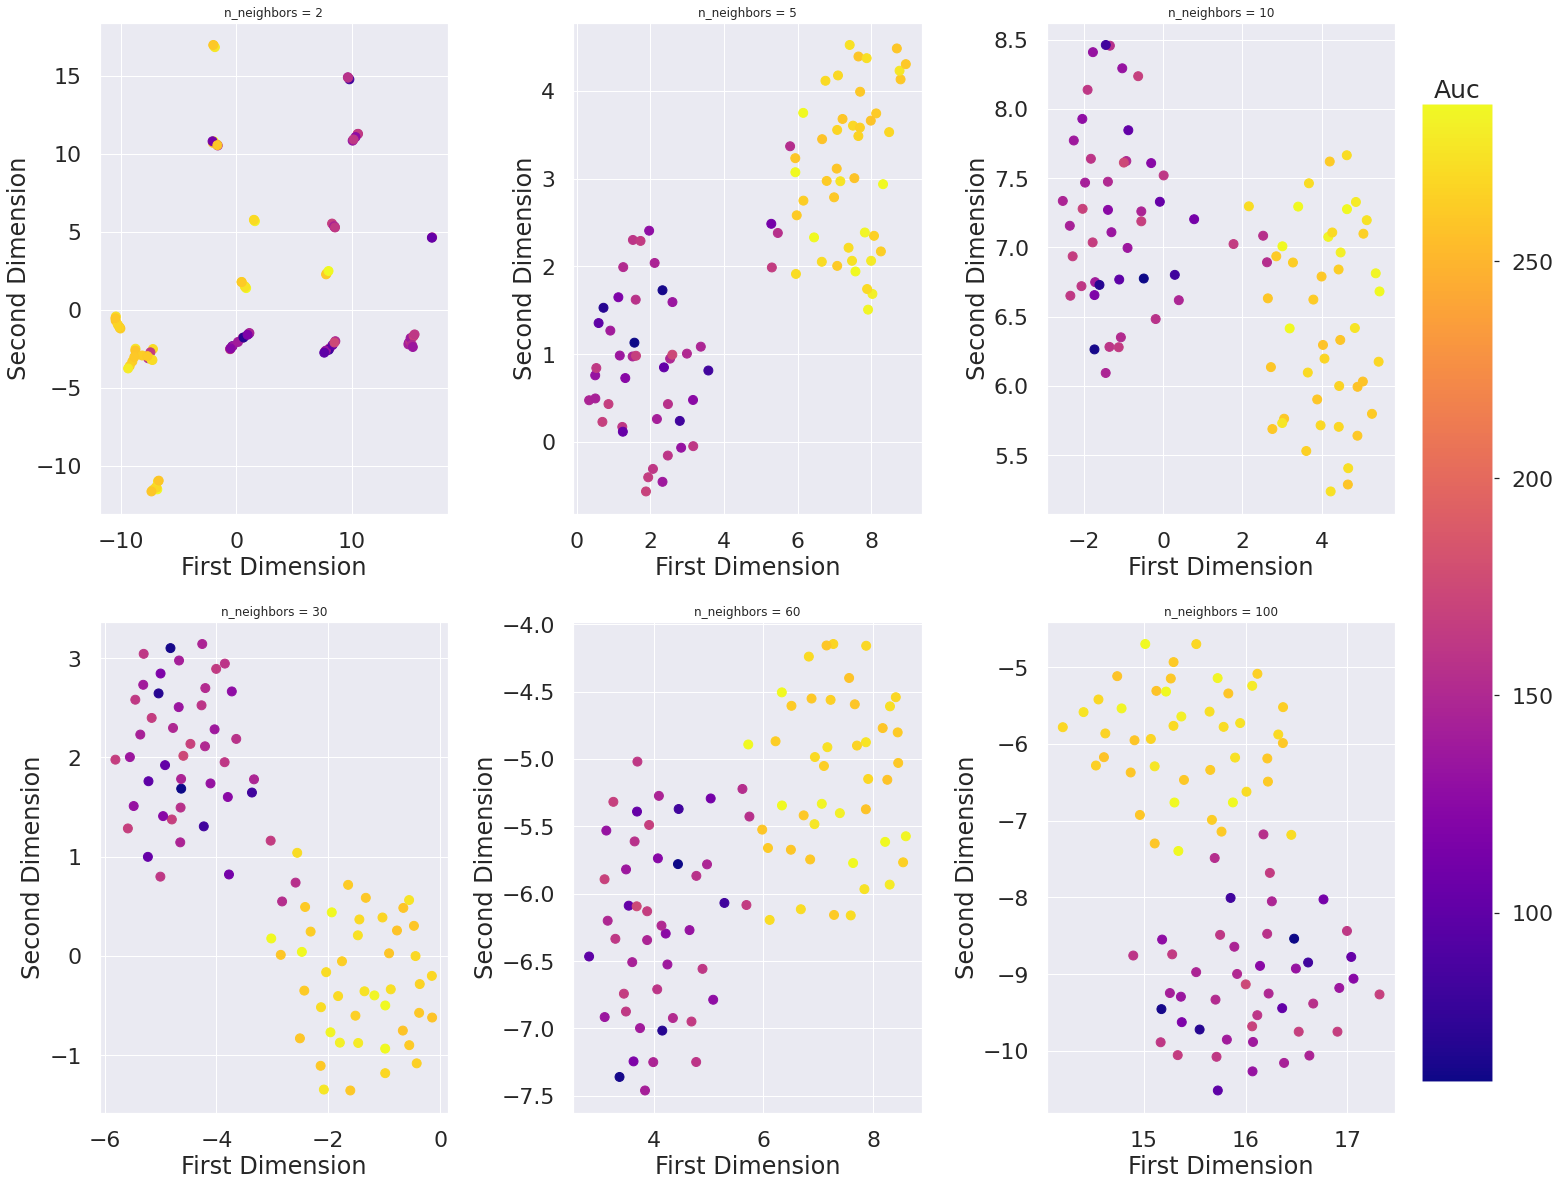

In [241]:
import umap.umap_ as umap

nn=[2,5,10,30,60,100] #n_neighbors parameters to test
plt.subplots(figsize=(20,17))
for j in range(len(nn)):
    plt.subplot(2,3,j+1)
    umaper = umap.UMAP(n_components=2,n_neighbors=nn[j])
    x_umap = umaper.fit_transform(X_im[X_im.columns[:-1]])

    aa=plt.scatter(x_umap[:, 0], x_umap[:, 1],c=X_im.auc,s=80,cmap='plasma')
    plt.title('n_neighbors = {0}'.format(nn[j]),fontsize=12)
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    axo = plt.axes([1,0.1,0.05,0.8])

    plt.title("Auc",fontsize=25)
    plt.colorbar(aa, cax=axo, orientation='vertical')
plt.tight_layout()
plt.show()

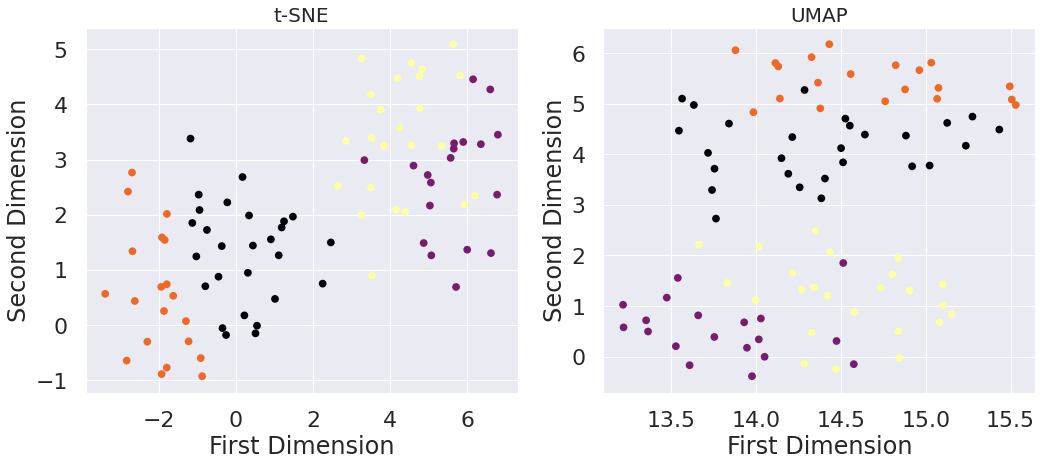

In [244]:
from sklearn import cluster

umaper = umap.UMAP(n_components=2,n_neighbors=50)
x_umap = umaper.fit_transform(X_im[X_im.columns[:-1]])


plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans_4.labels_, s=60, lw=0, cmap='inferno')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('t-SNE',fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=kmeans_4.labels_, s=60, lw=0, cmap='inferno')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('UMAP',fontsize=20)
plt.tight_layout()

plt.show()

## Gaussian mixtures <a class="anchor" id="gm-bullet"></a>

In Gaussian mixture modeling [Fraley & Raftery, The Computer Journal, 1998](https://academic.oup.com/comjnl/article-abstract/41/8/578/360856) we represent the data $\pmb{X}$ as a mixture model normal probability distributions:

$p(\pmb{x}) = \sum_{i=1}^{K}\pi_iN(\pmb{x}|\pmb{\mu_i},\pmb{\Sigma}_i)$, 

where $N(\pmb{x}|\pmb{\mu},\pmb{\Sigma})$ is a multidimensional Gaussian distribution with mean $\pmb{\mu}$ and covariance matrix $\pmb{\Sigma}$. The method uses the expectation-maximization algorithm to find the mixture components $\pmb{\pi_i}$, $\pmb{\mu_i}$ and covariance matrix $\pmb{\Sigma}_i$.

The sklearn [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) class implements the algorithm. It allows you to specify the number of clusters ('n_components'), intitial values for the parameters and constrains on the covariance matrices $\pmb{\Sigma}_i$. 

![gm](../images/gm.png)

A Bayesian version [BayesianGaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture) uses priors for the mixture parameters.

[0.48351168 0.51648832]


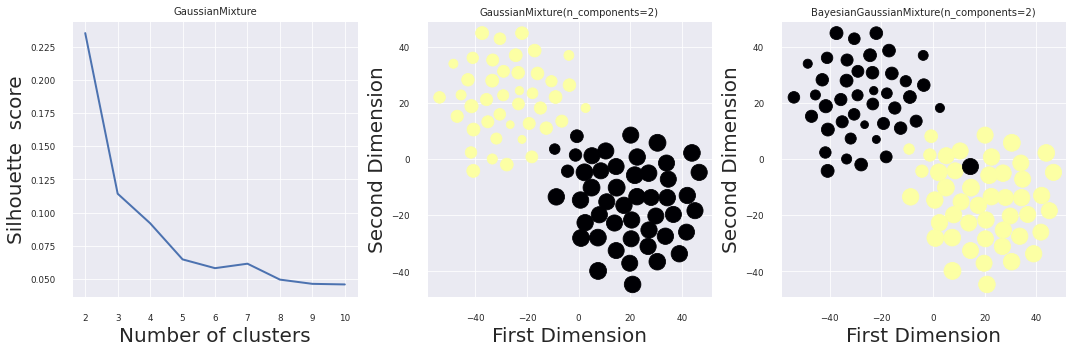

In [38]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

nr_clusters = np.arange(9)+2

silouhette = []
best_score = -np.infty
best_nr_clusters = 0
best_labels=[]
for n in nr_clusters:
    gmm = mixture.GaussianMixture(n)
    gmm.fit(x_pca)
    labels=gmm.predict(x_pca)
    score = silhouette_score(x_pca,labels)
    silouhette.append(score)

    if score > best_score:
        best_score = score
        best_nr_clusters = n
        best_gmm = gmm
        best_labels=labels
        
best_labels = best_gmm.predict(x_pca)

bgmm = mixture.BayesianGaussianMixture(n_components=len(set(best_labels)),covariance_type='full',weight_concentration_prior=0.01)
bgmm.fit(x_pca)
best_labels_bayes = bgmm.predict(x_pca)
print(np.sort(bgmm.weights_))

plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(nr_clusters, silouhette, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette  score')
plt.title('GaussianMixture',fontsize=10)

plt.subplot(1,3,2)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=best_labels,s=X_im.auc,cmap='inferno')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('GaussianMixture(n_components={0})'.format(best_nr_clusters),fontsize=10)

plt.subplot(1,3,3)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=best_labels_bayes,s=X_im.auc,cmap='inferno')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('BayesianGaussianMixture(n_components={0})'.format(len(set(best_labels))),fontsize=10)
plt.tight_layout()

plt.show()